# Importing data to a first dataframe for data exploration
-------------------------------------------------------------

In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns


%matplotlib inline

In [2]:
df = pd.read_csv('openfoodfacts.tsv' , sep='\t', low_memory = False)


In [3]:
pd.set_option('display.max_columns', None)   # Using this option to show all columns of this dataframe

In [4]:
df.head()

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,generic_name,quantity,packaging,packaging_tags,brands,brands_tags,categories,categories_tags,categories_en,origins,origins_tags,manufacturing_places,manufacturing_places_tags,labels,labels_tags,labels_en,emb_codes,emb_codes_tags,first_packaging_code_geo,cities,cities_tags,purchase_places,stores,countries,countries_tags,countries_en,ingredients_text,allergens,allergens_en,traces,traces_tags,traces_en,serving_size,no_nutriments,additives_n,additives,additives_tags,additives_en,ingredients_from_palm_oil_n,ingredients_from_palm_oil,ingredients_from_palm_oil_tags,ingredients_that_may_be_from_palm_oil_n,ingredients_that_may_be_from_palm_oil,ingredients_that_may_be_from_palm_oil_tags,nutrition_grade_uk,nutrition_grade_fr,pnns_groups_1,pnns_groups_2,states,states_tags,states_en,main_category,main_category_en,image_url,image_small_url,energy_100g,energy-from-fat_100g,fat_100g,saturated-fat_100g,-butyric-acid_100g,-caproic-acid_100g,-caprylic-acid_100g,-capric-acid_100g,-lauric-acid_100g,-myristic-acid_100g,-palmitic-acid_100g,-stearic-acid_100g,-arachidic-acid_100g,-behenic-acid_100g,-lignoceric-acid_100g,-cerotic-acid_100g,-montanic-acid_100g,-melissic-acid_100g,monounsaturated-fat_100g,polyunsaturated-fat_100g,omega-3-fat_100g,-alpha-linolenic-acid_100g,-eicosapentaenoic-acid_100g,-docosahexaenoic-acid_100g,omega-6-fat_100g,-linoleic-acid_100g,-arachidonic-acid_100g,-gamma-linolenic-acid_100g,-dihomo-gamma-linolenic-acid_100g,omega-9-fat_100g,-oleic-acid_100g,-elaidic-acid_100g,-gondoic-acid_100g,-mead-acid_100g,-erucic-acid_100g,-nervonic-acid_100g,trans-fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,-sucrose_100g,-glucose_100g,-fructose_100g,-lactose_100g,-maltose_100g,-maltodextrins_100g,starch_100g,polyols_100g,fiber_100g,proteins_100g,casein_100g,serum-proteins_100g,nucleotides_100g,salt_100g,sodium_100g,alcohol_100g,vitamin-a_100g,beta-carotene_100g,vitamin-d_100g,vitamin-e_100g,vitamin-k_100g,vitamin-c_100g,vitamin-b1_100g,vitamin-b2_100g,vitamin-pp_100g,vitamin-b6_100g,vitamin-b9_100g,folates_100g,vitamin-b12_100g,biotin_100g,pantothenic-acid_100g,silica_100g,bicarbonate_100g,potassium_100g,chloride_100g,calcium_100g,phosphorus_100g,iron_100g,magnesium_100g,zinc_100g,copper_100g,manganese_100g,fluoride_100g,selenium_100g,chromium_100g,molybdenum_100g,iodine_100g,caffeine_100g,taurine_100g,ph_100g,fruits-vegetables-nuts_100g,fruits-vegetables-nuts-estimate_100g,collagen-meat-protein-ratio_100g,cocoa_100g,chlorophyl_100g,carbon-footprint_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g
0,0000000003087,http://world-en.openfoodfacts.org/product/0000...,openfoodfacts-contributors,1474103866,2016-09-17T09:17:46Z,1474103893,2016-09-17T09:18:13Z,Farine de blé noir,NaN,1kg,NaN,NaN,Ferme t'y R'nao,ferme-t-y-r-nao,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,en:FR,en:france,France,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"en:to-be-completed, en:nutrition-facts-to-be-c...","en:to-be-completed,en:nutrition-facts-to-be-co...","To be completed,Nutrition facts to be complete...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0000000004530,http://world-en.openfoodfacts.org/product/0000...,usda-ndb-import,1489069957,2017-03-09T14:32:37Z,1489069957,2017-03-09T14:32:37Z,Banana Chips Sweetened (Whole),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,US,en:united-states,United States,"Bananas, vegetable oil (coconut oil, cor

### At first glance, we can see a lot of columns, even numerical ones, seem to have NaN values. We will further check on those

In [5]:
print('Number of colums in Dataframe : ', len(df.columns))
print('Number of rows in Dataframe : ', len(df.index))

Number of colums in Dataframe :  163
Number of rows in Dataframe :  356027


In [6]:
df.info(max_cols=df.shape[1])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 356027 entries, 0 to 356026
Data columns (total 163 columns):
code                                          356001 non-null object
url                                           356001 non-null object
creator                                       356024 non-null object
created_t                                     356024 non-null object
created_datetime                              356017 non-null object
last_modified_t                               356027 non-null object
last_modified_datetime                        356027 non-null object
product_name                                  338515 non-null object
generic_name                                  57714 non-null object
quantity                                      119285 non-null object
packaging                                     89959 non-null object
packaging_tags                                89959 non-null object
brands                                        326977 non-null o

### It looks like we have 56 columns which are "qualitative" (categorical) data (objects, probably strings, lists...) and 107 are float which will be used for further numerical analysis.

In [7]:
describe_df = df.describe()
describe_df

,no_nutriments,additives_n,ingredients_from_palm_oil_n,ingredients_from_palm_oil,ingredients_that_may_be_from_palm_oil_n,ingredients_that_may_be_from_palm_oil,nutrition_grade_uk,energy_100g,energy-from-fat_100g,fat_100g,saturated-fat_100g,-butyric-acid_100g,-caproic-acid_100g,-caprylic-acid_100g,-capric-acid_100g,-lauric-acid_100g,-myristic-acid_100g,-palmitic-acid_100g,-stearic-acid_100g,-arachidic-acid_100g,-behenic-acid_100g,-lignoceric-acid_100g,-cerotic-acid_100g,-montanic-acid_100g,-melissic-acid_100g,monounsaturated-fat_100g,polyunsaturated-fat_100g,omega-3-fat_100g,-alpha-linolenic-acid_100g,-eicosapentaenoic-acid_100g,-docosahexaenoic-acid_100g,omega-6-fat_100g,-linoleic-acid_100g,-arachidonic-acid_100g,-gamma-linolenic-acid_100g,-dihomo-gamma-linolenic-acid_100g,omega-9-fat_100g,-oleic-acid_100g,-elaidic-acid_100g,-gondoic-acid_100g,-mead-acid_100g,-erucic-acid_100g,-nervonic-acid_100g,trans-fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,-sucrose_100g,-glucose_100g,-fructose_100g,-lactose_100g,-maltose_100g,-maltodextrins_100g,starch_100g,polyols_100g,fiber_100g,proteins_100g,casein_100g,serum-proteins_100g,nucleotides_100g,salt_100g,sodium_100g,alcohol_100g,vitamin-a_100g,beta-carotene_100g,vitamin-d_100g,vitamin-e_100g,vitamin-k_100g,vitamin-c_100g,vitamin-b1_100g,vitamin-b2_100g,vitamin-pp_100g,vitamin-b6_100g,vitamin-b9_100g,folates_100g,vitamin-b12_100g,biotin_100g,pantothenic-acid_100g,silica_100g,bicarbonate_100g,potassium_100g,chloride_100g,calcium_100g,phosphorus_100g,iron_100g,magnesium_100g,zinc_100g,copper_100g,manganese_100g,fluoride_100g,selenium_100g,chromium_100g,molybdenum_100g,iodine_100g,caffeine_100g,taurine_100g,ph_100g,fruits-vegetables-nuts_100g,fruits-vegetables-nuts-estimate_100g,collagen-meat-protein-ratio_100g,cocoa_100g,chlorophyl_100g,carbon-footprint_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g
count,0.0,283867.000000,283867.000000,0.0,283867.000000,0.0,0.0,295367.000000,869.000000,2.794970e+05,263823.000000,0.0,0.0,1.0,2.000000,4.000000,1.0,1.0,1.0,27.000000,26.000000,0.0,0.0,1.0,0.0,23040.000000,23075.000000,938.000000,201.000000,43.000000,89.000000,207.000000,159.000000,9.000000,27.000000,26.000000,25.000000,15.000000,0.0,1.600000e+01,0.0,0.0,0.0,143443.000000,144170.000000,2.792200e+05,279186.000000,85.000000,32.000000,44.000000,278.000000,6.00000,11.000000,291.000000,451.000000,2.206830e+05,2.941610e+05,29.000000,17.000000,9.000000,289739.000000,289694.000000,4577.000000,137706.000000,35.000000,7207.000000,1472.000000,930.000000,141060.000000,11277.000000,10925.000000,11831.000000,6897.000000,5330.000000,3046.000000,5.390000e+03,331.000000,2551.000000,73.000000,99.000000,24848.000000,198.000000,141517.000000,5938.000000,140660.000000,6392.000000,3964.000000,2122.000000,1639.000000,99.000000,1181.000000,23.000000,20.000000,288.000000,91.000000,33.000000,52.000000,3228.000000,404.000000,182.000000,1383.000000,0.0,278.000000,254856.000000,254856.000000,0.0,0.0
mean,NaN,1.876851,0.023430,NaN,0.059736,NaN,NaN,1125.453320,587.216617,5.606587e+04,5.092460,NaN,NaN,7.4,6.040000,36.136182,18.9,8.1,3.0,10.383852,10.265385,NaN,NaN,61.0,NaN,10.501218,6.372548,3.476176,2.200218,2.805791,1.581979,18.734295,12.463013,0.051344,0.158230,0.063246,41.243200,26.053333,NaN,1.343750e-06,NaN,NaN,NaN,0.073487,0.020065,5.614020e+04,15.673428,12.822353,2.864063,24.836364,6.007263,17.10000,12.163636,30.943230,49.098894,3.843467e+05,5.326598e+04,4.398966,2.400000,0.021678,1.941281,0.764401,8.278337,0.000398,0.503896,0.000008,0.053610,0.033854,0.023394,0.332167,0.256490,0.020410,0.046952,0.006820,0.205586,2.741797e-04,0.000134,0.069210,0.433009,0.132496,0.424284,0.079895,0.127284,0.613267,0.003791,0.531415,0.007921,0.025613,0.003165,0.010042,0.003098,0.001478,0.000230,0.000465,2.075503,12.262055,6.476138,33.392680,60.360124,15.362637,52.102675,NaN,335.790664,9.166137,8.980656,NaN,NaN
std,NaN,2.501022,0.153094,NaN,0.280660,NaN,NaN,936.825952,713.255708,2.9

# What is the proportion of missing values per column/row? Should you keep, fill or remove these missing values? What would be the implications?
--------------------------------------------


In [8]:
df.isnull().sum().sum()

44183489

### Out of 58 Millions data, 44 millions are Null (75%)... we cannot drop or replace them all..We would lose almost all data which could make sense. We have to look more in detail.

In [9]:
df.isnull().sum(axis =0).mean()    # averge null value per column (271064 / 356027 = 76%)

271064.34969325154

In [10]:
df.isnull().sum(axis = 1).mean()   # average null per row (124/163 = 76%)

124.10151196398026

# Cleaning the data
---------------------------------------------

## Above we can see an average of 76% of Null Values in the dataset. It is huge, but it still means we have possibly 10 millions data that can be useful. 

## Let's clean a little :

In [11]:
# columns with at least on Null value
df.isnull().any(axis=0).sum()

161

In [12]:
# columns with ONLY Null value
df.isnull().all(axis=0).sum()

16

## 161 out of 163 columns at least have "one" Null value ; 16 of them, even are completely "empty" and we should drop them.

## Let's do the same with rows : 

In [13]:
df.isnull().any(axis=1).sum()

356027

In [14]:
df.isnull().all(axis=1).sum()

0

### All rows at least have one Null value, but none is completely Null. Which makes sense as we have 2 columns which are completely filled. (as seen later : 'last modified' and 'last modified datetime')

We can drop the columns fully "Null" as no data would be lost in this dataset

In [15]:
df = df.dropna(how='all', axis=1);   # dropping the 16 columns fully Null

In [16]:
df.isnull().all(axis=0).sum()    # checking no column is fully Null in df2 dataframe

0

In [17]:
df.shape

(356027, 147)

### For the rest of the data we are keeping, it would not make sense to fill the number columns with "0" as we cannot make an assumption based on the following, or previous values... or even with a mean values as all food in the dataset can be completely different from one another. 

**Replacing by 0 would change all the data average, quartiles, median....but we can try and observe how different the mean/min/max/median values are impacted**


In [18]:
set(df.dtypes)

{dtype('float64'), dtype('O')}

In [19]:
# select numeric columns
numeric_columns = df.select_dtypes(np.number).columns


In [20]:
# fill 0 to all NaN 
def fill_na(df,value,list_column):
    df = df.copy()
    for column in list_column:
        df.loc[:,column] = df[column].fillna(value)
        
    return df

df_0 = fill_na(df,0,numeric_columns);


In [21]:
df_0.shape

(356027, 147)

In [22]:
df_0.isnull().sum().sum()   # check how many null data left ==> 10 millions instead of 44 million.

10964229

In [23]:
describe_df_0 = df_0.describe()

In [24]:
print('Number of colums in Dataframe : ', len(describe_df_0.columns))
print('Number of rows in Dataframe : ', len(describe_df_0.index))

Number of colums in Dataframe :  91
Number of rows in Dataframe :  8


 # comparing one column to the original dataframe to notice big impact on statistic values

In [25]:
describe_df['energy_100g'] - describe_df_0['energy_100g']  # original dataframe description - new fillna=0 dataframe

count   -60660.000000
mean       191.755115
std        -15.618937
min          0.000000
25%        236.000000
50%        305.000000
75%        105.000000
max          0.000000
Name: energy_100g, dtype: float64

**As we can see, df_0 numerical data (replaced NaN by 0) are really different from our original dataframe df.** That's why I would rather work with NaN missing values which do not modify statistics we can measure !!!


## Let's stick to the original dataframe, with deleted columns : df

# Numerical data : What errors or outliers can we drop ?

What are the mean/min/max/median values of numerical columns? Do you spot any issue from analyzing those statistics? ex. a negative amount of sugar, a maximum value extremely far from the 75% percentile (outlier?)

In [26]:
describe_df = df.describe()
describe_df

,additives_n,ingredients_from_palm_oil_n,ingredients_that_may_be_from_palm_oil_n,energy_100g,energy-from-fat_100g,fat_100g,saturated-fat_100g,-caprylic-acid_100g,-capric-acid_100g,-lauric-acid_100g,-myristic-acid_100g,-palmitic-acid_100g,-stearic-acid_100g,-arachidic-acid_100g,-behenic-acid_100g,-montanic-acid_100g,monounsaturated-fat_100g,polyunsaturated-fat_100g,omega-3-fat_100g,-alpha-linolenic-acid_100g,-eicosapentaenoic-acid_100g,-docosahexaenoic-acid_100g,omega-6-fat_100g,-linoleic-acid_100g,-arachidonic-acid_100g,-gamma-linolenic-acid_100g,-dihomo-gamma-linolenic-acid_100g,omega-9-fat_100g,-oleic-acid_100g,-gondoic-acid_100g,trans-fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,-sucrose_100g,-glucose_100g,-fructose_100g,-lactose_100g,-maltose_100g,-maltodextrins_100g,starch_100g,polyols_100g,fiber_100g,proteins_100g,casein_100g,serum-proteins_100g,nucleotides_100g,salt_100g,sodium_100g,alcohol_100g,vitamin-a_100g,beta-carotene_100g,vitamin-d_100g,vitamin-e_100g,vitamin-k_100g,vitamin-c_100g,vitamin-b1_100g,vitamin-b2_100g,vitamin-pp_100g,vitamin-b6_100g,vitamin-b9_100g,folates_100g,vitamin-b12_100g,biotin_100g,pantothenic-acid_100g,silica_100g,bicarbonate_100g,potassium_100g,chloride_100g,calcium_100g,phosphorus_100g,iron_100g,magnesium_100g,zinc_100g,copper_100g,manganese_100g,fluoride_100g,selenium_100g,chromium_100g,molybdenum_100g,iodine_100g,caffeine_100g,taurine_100g,ph_100g,fruits-vegetables-nuts_100g,fruits-vegetables-nuts-estimate_100g,collagen-meat-protein-ratio_100g,cocoa_100g,carbon-footprint_100g,nutrition-score-fr_100g,nutrition-score-uk_100g
count,283867.000000,283867.000000,283867.000000,295367.000000,869.000000,2.794970e+05,263823.000000,1.0,2.000000,4.000000,1.0,1.0,1.0,27.000000,26.000000,1.0,23040.000000,23075.000000,938.000000,201.000000,43.000000,89.000000,207.000000,159.000000,9.000000,27.000000,26.000000,25.000000,15.000000,1.600000e+01,143443.000000,144170.000000,2.792200e+05,279186.000000,85.000000,32.000000,44.000000,278.000000,6.00000,11.000000,291.000000,451.000000,2.206830e+05,2.941610e+05,29.000000,17.000000,9.000000,289739.000000,289694.000000,4577.000000,137706.000000,35.000000,7207.000000,1472.000000,930.000000,141060.000000,11277.000000,10925.000000,11831.000000,6897.000000,5330.000000,3046.000000,5.390000e+03,331.000000,2551.000000,73.000000,99.000000,24848.000000,198.000000,141517.000000,5938.000000,140660.000000,6392.000000,3964.000000,2122.000000,1639.000000,99.000000,1181.000000,23.000000,20.000000,288.000000,91.000000,33.000000,52.000000,3228.000000,404.000000,182.000000,1383.000000,278.000000,254856.000000,254856.000000
mean,1.876851,0.023430,0.059736,1125.453320,587.216617,5.606587e+04,5.092460,7.4,6.040000,36.136182,18.9,8.1,3.0,10.383852,10.265385,61.0,10.501218,6.372548,3.476176,2.200218,2.805791,1.581979,18.734295,12.463013,0.051344,0.158230,0.063246,41.243200,26.053333,1.343750e-06,0.073487,0.020065,5.614020e+04,15.673428,12.822353,2.864063,24.836364,6.007263,17.10000,12.163636,30.943230,49.098894,3.843467e+05,5.326598e+04,4.398966,2.400000,0.021678,1.941281,0.764401,8.278337,0.000398,0.503896,0.000008,0.053610,0.033854,0.023394,0.332167,0.256490,0.020410,0.046952,0.006820,0.205586,2.741797e-04,0.000134,0.069210,0.433009,0.132496,0.424284,0.079895,0.127284,0.613267,0.003791,0.531415,0.007921,0.025613,0.003165,0.010042,0.003098,0.001478,0.000230,0.000465,2.075503,12.262055,6.476138,33.392680,60.360124,15.362637,52.102675,335.790664,9.166137,8.980656
std,2.501022,0.153094,0.280660,936.825952,713.255708,2.963385e+07,7.965148,NaN,0.226274,24.101433,NaN,NaN,NaN,3.939718,3.388090,NaN,16.789189,10.930572,8.665162,7.778110,13.114442,1.981251,32.590392,110.915670,0.029298,0.030498,0.011144,25.061032,25.545541,4.643544e-07,1.539417,0.357963,2.964854e+07,21.983635,15.164302,5.881463,29.313796,13.986130,17.80719,8.372129,24.834337,33.116098,1.805529e+08,2.888578e+07,3.027864,2.162175,0.003072,120.545973,47.462729,10.968414,0.073239,2.524722,0.000356,0.662779,1.024723,2.234928

### We can visually notice :
- numerous outliers / errors far from 75% percentile or Mean + 3 STD
- a lot of max are > 100g, which does not makes sense based on the units _100g
- negative values
- energy in KJ (I supposed KJ and not Kcal based on the values) is maxed to ~3700kj theoretically

## Negatives in grams ?

In [27]:
(describe_df.min()<0)

additives_n                                False
ingredients_from_palm_oil_n                False
ingredients_that_may_be_from_palm_oil_n    False
energy_100g                                False
energy-from-fat_100g                       False
fat_100g                                   False
saturated-fat_100g                         False
-caprylic-acid_100g                        False
-capric-acid_100g                          False
-lauric-acid_100g                          False
-myristic-acid_100g                        False
-palmitic-acid_100g                        False
-stearic-acid_100g                         False
-arachidic-acid_100g                       False
-behenic-acid_100g                         False
-montanic-acid_100g                        False
monounsaturated-fat_100g                   False
polyunsaturated-fat_100g                   False
omega-3-fat_100g                           False
-alpha-linolenic-acid_100g                 False
-eicosapentaenoic-ac

In [28]:
(describe_df.min()<0).sum()

13

### We can see here : 13 columns have negatives (example above : Iron, Silica...) which is not possible for a cumulative value. 
### However nutrition-scores also are sometimes negatives, but seems more sensible based on how it is calculated.

### Let's compute a way to replace negative values by 0 except the last columns : "nutrition_score_..."

In [29]:
# all numerical columns
numeric_columns = df.select_dtypes(np.number).columns

# keeps only columns with cumulative value, means we don't take nutrition_scores
numeric_cumulative = numeric_columns[0:-2]

In [30]:
def change_negatives(df, value, list_column):
    df=df.copy()
    for column in list_column:
        df[df[column] < 0] = value       
    return df

df = change_negatives(df,0,numeric_cumulative);
df.describe().round(2)

,additives_n,ingredients_from_palm_oil_n,ingredients_that_may_be_from_palm_oil_n,energy_100g,energy-from-fat_100g,fat_100g,saturated-fat_100g,-caprylic-acid_100g,-capric-acid_100g,-lauric-acid_100g,-myristic-acid_100g,-palmitic-acid_100g,-stearic-acid_100g,-arachidic-acid_100g,-behenic-acid_100g,-montanic-acid_100g,monounsaturated-fat_100g,polyunsaturated-fat_100g,omega-3-fat_100g,-alpha-linolenic-acid_100g,-eicosapentaenoic-acid_100g,-docosahexaenoic-acid_100g,omega-6-fat_100g,-linoleic-acid_100g,-arachidonic-acid_100g,-gamma-linolenic-acid_100g,-dihomo-gamma-linolenic-acid_100g,omega-9-fat_100g,-oleic-acid_100g,-gondoic-acid_100g,trans-fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,-sucrose_100g,-glucose_100g,-fructose_100g,-lactose_100g,-maltose_100g,-maltodextrins_100g,starch_100g,polyols_100g,fiber_100g,proteins_100g,casein_100g,serum-proteins_100g,nucleotides_100g,salt_100g,sodium_100g,alcohol_100g,vitamin-a_100g,beta-carotene_100g,vitamin-d_100g,vitamin-e_100g,vitamin-k_100g,vitamin-c_100g,vitamin-b1_100g,vitamin-b2_100g,vitamin-pp_100g,vitamin-b6_100g,vitamin-b9_100g,folates_100g,vitamin-b12_100g,biotin_100g,pantothenic-acid_100g,silica_100g,bicarbonate_100g,potassium_100g,chloride_100g,calcium_100g,phosphorus_100g,iron_100g,magnesium_100g,zinc_100g,copper_100g,manganese_100g,fluoride_100g,selenium_100g,chromium_100g,molybdenum_100g,iodine_100g,caffeine_100g,taurine_100g,ph_100g,fruits-vegetables-nuts_100g,fruits-vegetables-nuts-estimate_100g,collagen-meat-protein-ratio_100g,cocoa_100g,carbon-footprint_100g,nutrition-score-fr_100g,nutrition-score-uk_100g
count,283878.00,283878.00,283878.00,295378.00,900.00,2.795080e+05,263837.00,32.00,33.00,35.00,32.00,32.00,32.00,47.00,46.00,32.00,23067.00,23102.00,969.00,232.00,72.00,109.00,238.00,190.00,40.00,47.00,46.00,56.00,46.00,37.0,143458.00,144185.00,2.792310e+05,279200.00,116.00,63.00,75.00,309.00,37.00,42.00,322.00,482.00,2.206990e+05,2.941630e+05,60.00,48.00,40.00,289750.00,289705.00,4608.00,137721.00,66.00,7237.00,1503.00,961.00,141075.00,11307.00,10955.00,11856.00,6927.00,5360.00,3077.00,5420.00,362.00,2571.00,93.00,130.00,24877.00,229.00,141532.00,5969.00,140676.00,6423.00,3994.00,2152.00,1670.00,130.00,1211.00,54.00,51.0,319.00,122.00,64.00,83.00,3259.00,435.00,213.00,1414.00,309.0,254873.00,254873.00
mean,1.88,0.02,0.06,1125.35,566.99,5.606366e+04,5.09,0.23,0.37,4.13,0.59,0.25,0.09,4.33,4.25,1.91,10.49,6.36,3.36,1.91,1.66,0.86,16.29,10.43,0.01,0.05,0.02,18.41,8.50,0.0,0.07,0.02,5.613799e+04,15.67,9.40,1.45,14.57,5.40,2.77,3.19,27.96,45.94,3.843189e+05,5.326562e+04,2.13,0.85,0.00,1.94,0.76,8.22,0.00,0.27,0.00,0.05,0.03,0.02,0.33,0.26,0.02,0.05,0.01,0.20,0.00,0.00,0.07,0.47,0.10,0.42,0.07,0.13,0.61,0.00,0.53,0.01,0.03,0.00,0.01,0.00,0.00,0.0,0.00,1.55,6.32,4.06,33.08,56.06,13.13,50.96,302.1,9.17,8.98
std,2.50,0.15,0.28,936.85,708.99,2.963326e+07,7.96,1.31,1.46,13.69,3.34,1.43,0.53,6.41,6.19,10.78,16.78,10.93,8.55,7.28,10.18,1.63,31.03,101.52,0.03,0.07,0.03,26.50,18.85,0.0,1.54,0.36,2.964796e+07,21.98,14.16,4.40,25.51,13.39,9.21,6.81,25.31,34.23,1.805463e+08,2.888568e+07,3.04,1.71,0.01,120.54,47.46,10.95,0.07,1.84,0.00,0.66,1.01,2.23,2.62,1.27,0.32,1.66,0.33,5.10,0.02,0.00,1.45,1.13,0.19,12.50,0.13,3.35,11.93,0.22,13.33,0.08,0.89,0.03,0.05,0.10,0.00,0.0,0.00,6.72,49.99,3.53,32.91,32.20,6.41,20.31,413.9,9.00,9.15
min,0.00,0.00,0.00,0.00,0.00,0.000000e+00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.000000e+00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.000000e+00,0.000000e+00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,-15.00,-15.00
25%,0.00,0.00,0.00,381.00,35.45,1.000000e-01,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.50,0.05,0.00,0.00,1.09,0.35,0.00,0.00,0.00,0.00,0.00,0.0,0.00,

In [31]:
(df.describe().min()<0).sum()   # we indeed have kept the only Minimum < 0 for Nutrition_Scores

2

### This function seems a bit "heavy" as the "for loop" goes through each column, but eventually it works

### From now on. we will work from this dataframe : df
It has 
- no negative values for cumulative numerical data
- deleted all 16 columns totally "Null" which bring no useful information
- size : 356'027 rows x 147 columns (56 objects columns + 91 non null numeric columns)


## Filter All Values > 100  
(except Energy which is not in grams but KJ)

In [32]:
# Create a list of numerical columns without "Energy" types : 
numeric_columns_excl_energy = list(numeric_columns)
numeric_columns_excl_energy.remove('energy_100g')
numeric_columns_excl_energy.remove('energy-from-fat_100g')

In [33]:
filter_100g = df[numeric_columns_excl_energy] > 100 
filter_100g.sum()

additives_n                                  0
ingredients_from_palm_oil_n                  0
ingredients_that_may_be_from_palm_oil_n      0
fat_100g                                     4
saturated-fat_100g                           2
-caprylic-acid_100g                          0
-capric-acid_100g                            0
-lauric-acid_100g                            0
-myristic-acid_100g                          0
-palmitic-acid_100g                          0
-stearic-acid_100g                           0
-arachidic-acid_100g                         0
-behenic-acid_100g                           0
-montanic-acid_100g                          0
monounsaturated-fat_100g                     0
polyunsaturated-fat_100g                     0
omega-3-fat_100g                             1
-alpha-linolenic-acid_100g                   0
-eicosapentaenoic-acid_100g                  0
-docosahexaenoic-acid_100g                   0
omega-6-fat_100g                             1
-linoleic-aci

In [34]:
filter_100g.sum().sum()

503

## We can reasonably drop these rows :

In [35]:
# Create a function to drop rows above a value for each column : 
def errors_rows(df, list_column, value):
    df=df.copy()
    for column in list_column:
        df = df.drop(df.loc[df[column] > value ].index, axis = 0 )    
    return df


In [36]:
# Use this function to remove rows > 100g
df = errors_rows(df, numeric_columns_excl_energy, 100)

# check we have no more > 100g in these columns
print('Datapoints above 100g per 100g:',(df[numeric_columns_excl_energy] > 100).sum().sum())

Datapoints above 100g per 100g: 0


In [37]:
# Use this function to remove energy > 3700KJ
df = errors_rows(df, ['energy_100g','energy-from-fat_100g'], 3700)

# check we have no more > 3700KJ in these columns
print('Energy above 3700 KJ :',(df['energy_100g'] > 3700).sum().sum())
print('Energy from fat above 3700 KJ :',(df['energy-from-fat_100g'] > 3700).sum().sum())

Energy above 3700 KJ : 0
Energy from fat above 3700 KJ : 0


# Outliers ?

### We have removed obvious errors above, now let's work on outliers.

We might need to work on a lighter numerical dataframe, **I visually chose some numerical columns based on the number of values filled properly (counts) and relevance by their names.**

Then I came about a "Threshold" of 50'000 to drop numerical columns I consider less relevant, same for Objects columns.

### We can see numerous object columns which are useless to us (URLs, tags..) or are alsmost duplicates of other columns (codes/tags/countries...)
Let's make a shorter list of possibly "useful" columns for objects, we will filter later on numerical columns :

In [38]:
 # list of intersting object columns already selected :
list_col_object = ['code','creator','created_t','last_modified_t','product_name','quantity','brands_tags','countries_en','cities_tags','ingredients_text','additives', 'traces_tags','main_category_en','pnns_groups_1','pnns_groups_2']

In [39]:
# filter "interesting" numerical columns > 50'000 data
list_col_num_50k = list(df.select_dtypes(np.number).dropna(thresh = 50000, axis = 1).columns)
list_col_num_50k

['additives_n',
 'ingredients_from_palm_oil_n',
 'ingredients_that_may_be_from_palm_oil_n',
 'energy_100g',
 'fat_100g',
 'saturated-fat_100g',
 'trans-fat_100g',
 'cholesterol_100g',
 'carbohydrates_100g',
 'sugars_100g',
 'fiber_100g',
 'proteins_100g',
 'salt_100g',
 'sodium_100g',
 'vitamin-a_100g',
 'vitamin-c_100g',
 'calcium_100g',
 'iron_100g',
 'nutrition-score-fr_100g',
 'nutrition-score-uk_100g']

In [40]:
keep_column = list_col_object + list_col_num_50k

In [41]:
# make a lighter df with "only" 20 numerical columns and 16 objects columns = 36 columns
df_light = df.loc[:,keep_column]   
df_light.shape

(354797, 35)

In [42]:
df_light.describe()

,additives_n,ingredients_from_palm_oil_n,ingredients_that_may_be_from_palm_oil_n,energy_100g,fat_100g,saturated-fat_100g,trans-fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,vitamin-a_100g,vitamin-c_100g,calcium_100g,iron_100g,nutrition-score-fr_100g,nutrition-score-uk_100g
count,282809.000000,282809.000000,282809.000000,294176.000000,278411.000000,262789.000000,143093.000000,143845.000000,278153.000000,278280.000000,219949.000000,292999.000000,288594.000000,288549.000000,137511.000000,140863.000000,141310.000000,140461.000000,253996.000000,253996.000000
mean,1.881853,0.023461,0.059804,1116.251134,12.612069,5.028730,0.065797,0.019624,31.569229,15.679105,2.856359,7.175451,1.540111,0.606437,0.000397,0.014497,0.102358,0.003674,9.146947,8.953165
std,2.502808,0.153197,0.280803,785.088804,17.061448,7.673009,0.930241,0.318246,28.968249,20.952798,4.678690,8.256514,6.078004,2.393083,0.073291,0.460116,0.584802,0.214860,8.999766,9.146232
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-15.000000,-15.000000
25%,0.000000,0.000000,0.000000,381.000000,0.100000,0.000000,0.000000,0.000000,5.700000,1.230000,0.000000,0.800000,0.060000,0.024000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
50%,1.000000,0.000000,0.000000,1088.000000,5.210000,1.790000,0.000000,0.000000,20.000000,5.420000,1.500000,4.900000,0.561340,0.221000,0.000000,0.000000,0.036000,0.001010,10.000000,9.000000
75%,3.000000,0.000000,0.000000,1674.000000,20.000000,7.140000,0.000000,0.020000,57.650000,23.330000,3.600000,10.000000,1.358900,0.535000,0.000107,0.003800,0.107000,0.002400,16.000000,16.000000
max,30.000000,2.000000,6.000000,3700.000000,100.000000,100.000000,100.000000,95.238000,100.000000,100.000000,100.000000,100.000000,100.000000,39.370079,26.700000,100.000000,99.006000,50.000000,40.000000,37.000000


## Plots and distributions : df_light (20 numerical columns)

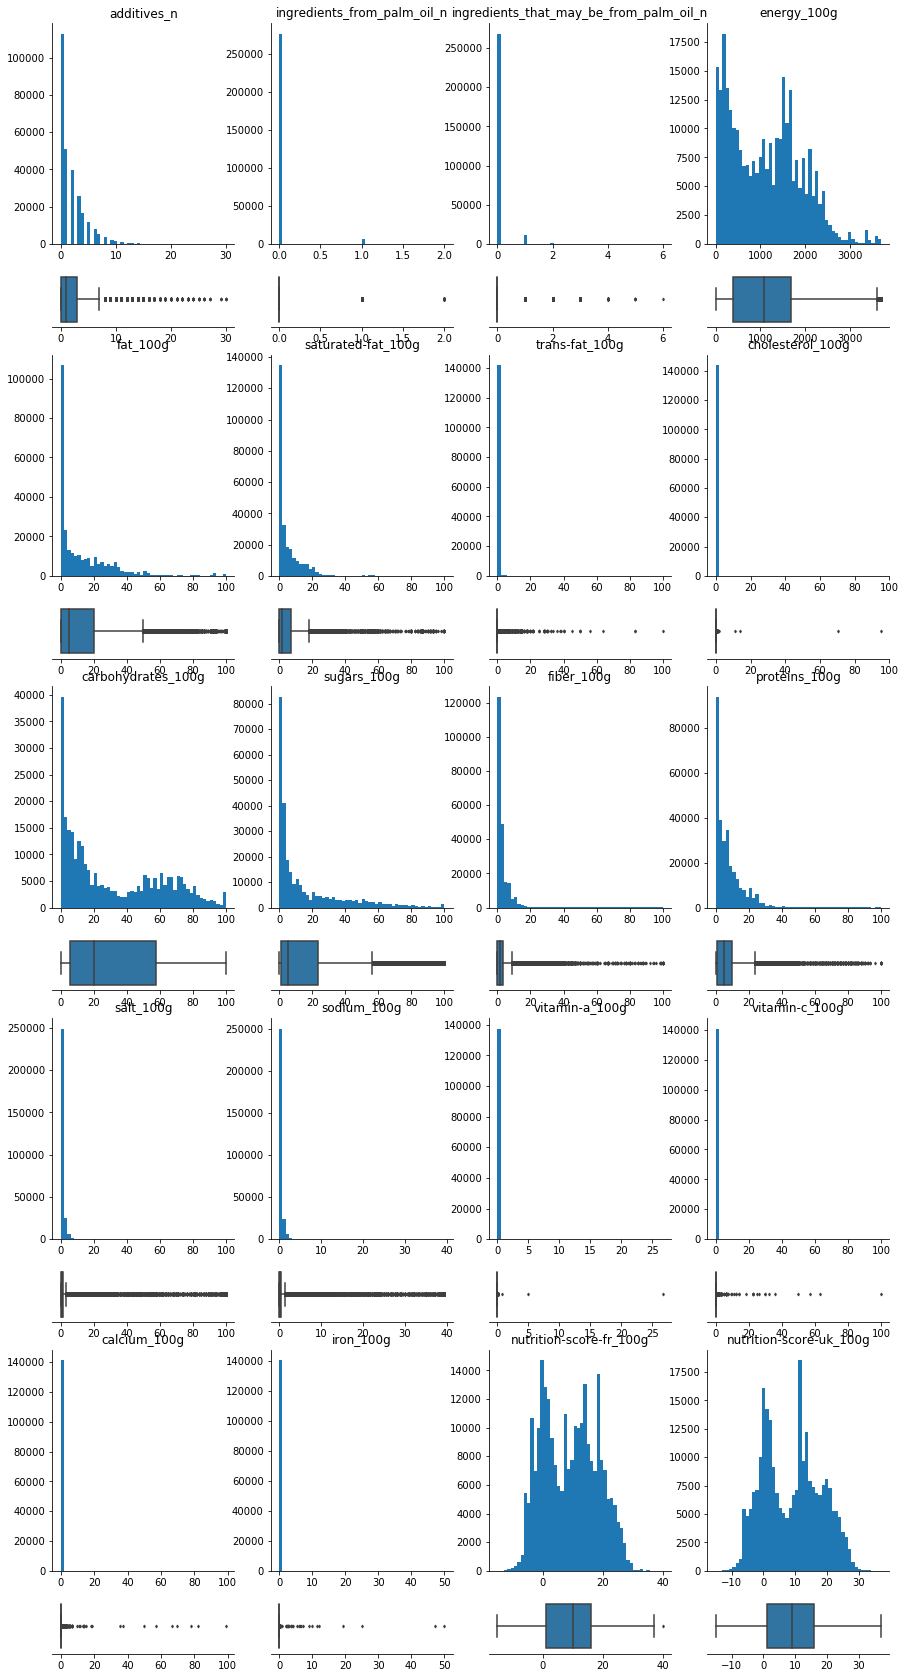

In [43]:
# 20 subplots of all Numerical data
fig, axes = plt.subplots(
    10, 4 ,gridspec_kw={"height_ratios": (0.8, 0.2, 0.8, 0.2, 0.8, 0.2, 0.8, 0.2, 0.8 ,0.2)}, figsize=(15,30)
)
# pairing feature with column in plot
for row, i in zip([0,2,4,6,8],[0,1,2,3,4])  :

    for (feat, plot_col) in zip(list_col_num_50k[0+4*i:4+4*i], [0,1,2,3]  ):

        axes[0+row, plot_col].hist(df_light[feat], bins=50)
        axes[0+row, plot_col].set_title("{}".format(feat))
        sns.despine(ax=axes[0+row, plot_col])
        sns.boxplot(df_light[feat], ax=axes[1+row, plot_col], fliersize=2)
        axes[1+row, plot_col].set(yticks=[])
        sns.despine(ax=axes[1+row, plot_col], left=True)

    for ax in axes.flatten():
        ax.set_xlabel("")

plt.show()

### We notice here that most of our data are difficult to "read" as they still have many outliers in the dataset
**Let's drop() the outliers using the "zscore" limits for all our numerical columns (even though 4 of them are already "clean" : energy_100g, carbohydrates_100g, and both nutrition_scores)**

In [44]:
# let's create a filter using the : distance to median (instead of mean to be less influenced by outliers) > 3 times standard deviation 
zfilter_df = np.abs(df_light[list_col_num_50k] - df_light[list_col_num_50k].median()) > (3 * df_light[list_col_num_50k].std())
print(zfilter_df.sum()) # how many outliers by column
print(zfilter_df.sum().sum(),' outliers totally')

additives_n                                 7271
ingredients_from_palm_oil_n                 6556
ingredients_that_may_be_from_palm_oil_n    14292
energy_100g                                 1382
fat_100g                                    7030
saturated-fat_100g                          4804
trans-fat_100g                               976
cholesterol_100g                              11
carbohydrates_100g                             0
sugars_100g                                 9745
fiber_100g                                  3990
proteins_100g                               4598
salt_100g                                   3169
sodium_100g                                 3160
vitamin-a_100g                                 3
vitamin-c_100g                               108
calcium_100g                                 165
iron_100g                                     27
nutrition-score-fr_100g                        5
nutrition-score-uk_100g                        3
dtype: int64
67295  

In [45]:
# Create a function to drop rows on a boolean condition (here the test for zfilter): 
def drop_outliers(df, list_column):
    df=df.copy()
    
    #loop function for each column
    for column in list_column:
        df = df.drop(df.loc[np.abs(df[column] - df[column].median()) > (3*df[column].std())].index, axis = 0 )    
    return df


In [46]:
# Dropping Outliers with zscore technique
df_light_outliers = drop_outliers(df_light, list_col_num_50k)
print('We have now a dataframe of dimension : ', df_light_outliers.shape, ' vs ', df_light.shape, 'initially')

We have now a dataframe of dimension :  (290491, 35)  vs  (354797, 35) initially


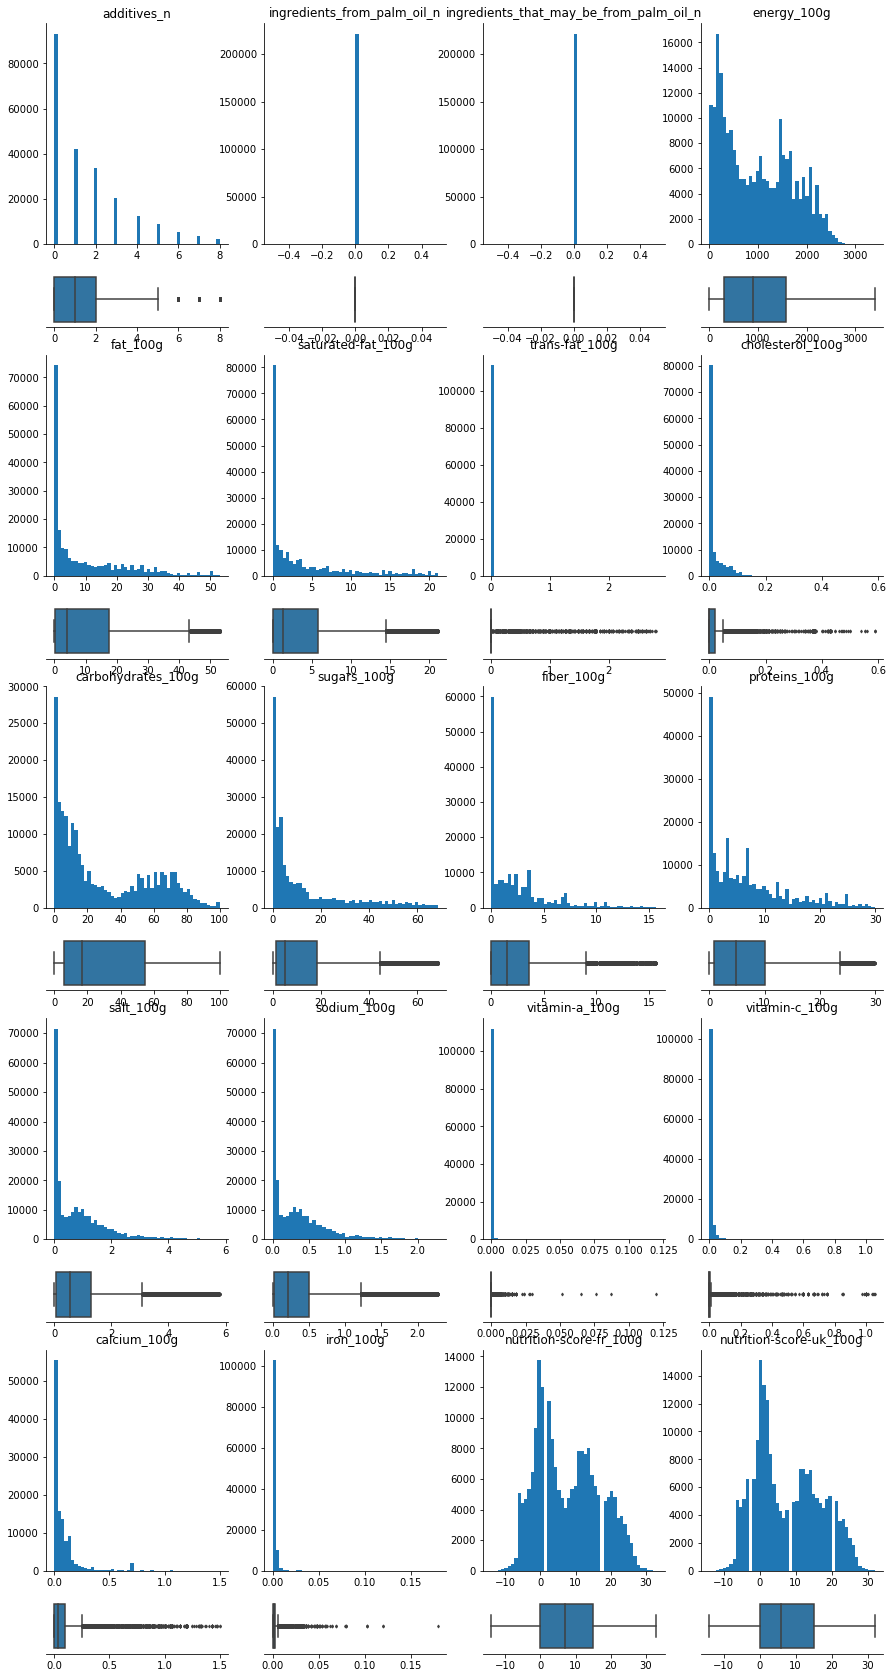

In [47]:
# 20 subplots of all Numerical data
fig, axes = plt.subplots(
    10, 4 ,gridspec_kw={"height_ratios": (0.8, 0.2, 0.8, 0.2, 0.8, 0.2, 0.8, 0.2, 0.8 ,0.2)}, figsize=(15,30)
)
# pairing feature with column in plot
for row, i in zip([0,2,4,6,8],[0,1,2,3,4])  :

    for (feat, plot_col) in zip(list_col_num_50k[0+4*i:4+4*i], [0,1,2,3]  ):

        axes[0+row, plot_col].hist(df_light_outliers[feat], bins=50)
        axes[0+row, plot_col].set_title("{}".format(feat))
        sns.despine(ax=axes[0+row, plot_col])
        sns.boxplot(df_light_outliers[feat], ax=axes[1+row, plot_col], fliersize=2)
        axes[1+row, plot_col].set(yticks=[])
        sns.despine(ax=axes[1+row, plot_col], left=True)

    for ax in axes.flatten():
        ax.set_xlabel("")

plt.show()

### I noticed graphically that the "zscore" technique above, does not work well for some data like (vitamin A, Iron, carbohydrates, cholesterol) which show too few outliers and the graphics are way too spread because of the high Standard Deviation  (see above)

### So I will try another idea I thought interesting, putting the limit to 95th percentile, so we can keep most of the data and have visual plots working 


In [48]:
# Create a function to drop rows on a boolean condition (here the test for 95th percentile): 
def drop_outliers_v2(df, list_column):
    df=df.copy()
    
    #loop function for each column
    for column in list_column:
        df = df.drop(df.loc[np.abs(df[column] - df[column].median()) > df[column].quantile(.95)].index, axis = 0 )    
    return df


In [49]:
# Dropping Outliers with 95th percentile technique
df_light_outliers_v2 = drop_outliers_v2(df_light, list_col_num_50k)
print('We have now a dataframe of dimension : ', df_light_outliers_v2.shape, ' vs ', df_light.shape, 'initially')

We have now a dataframe of dimension :  (251547, 35)  vs  (354797, 35) initially


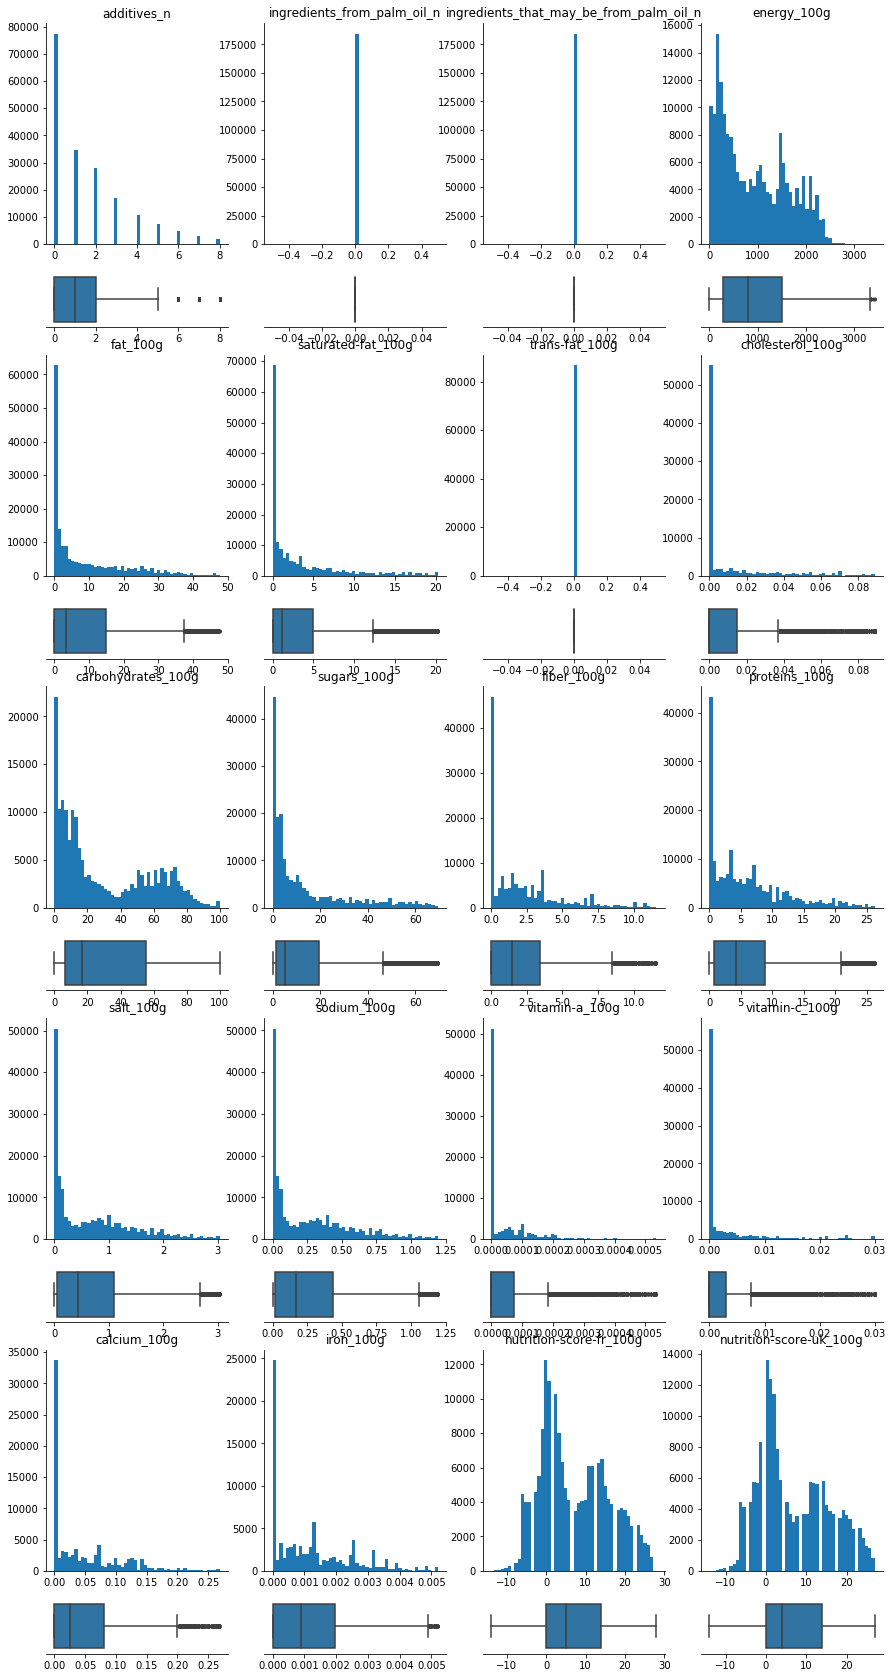

In [50]:
# 20 double subplots (4 x 2 x 5) of all Numerical data
fig, axes = plt.subplots(
    10, 4 ,gridspec_kw={"height_ratios": (0.8, 0.2, 0.8, 0.2, 0.8, 0.2, 0.8, 0.2, 0.8 ,0.2)}, figsize=(15,30)
)
# pairing feature with column in plot
for row, i in zip([0,2,4,6,8],[0,1,2,3,4])  :

    for (feat, plot_col) in zip(list_col_num_50k[0+4*i:4+4*i], [0,1,2,3]  ):

        axes[0+row, plot_col].hist(df_light_outliers_v2[feat], bins=50)
        axes[0+row, plot_col].set_title("{}".format(feat))
        sns.despine(ax=axes[0+row, plot_col])
        sns.boxplot(df_light_outliers_v2[feat], ax=axes[1+row, plot_col], fliersize=2)
        axes[1+row, plot_col].set(yticks=[])
        sns.despine(ax=axes[1+row, plot_col], left=True)

    for ax in axes.flatten():
        ax.set_xlabel("")

plt.show()

# My Observations : 

- all variables but nutrition_scores are positive (which is what we wanted)
- not all variables I chose are actually interesting : the 2 "ingredients from palm_oil" and "trans-fat" don't bring much information as they are mostly 0
- most key figures look like they are close to 0 most of the time, and the further the lower : (exponential ? Poisson Distribution ?)
- nutrition_scores look more like a Normal Distribution, or more precisely two normal Distribution added to one another. One would be centered on 0 and the other one on ~13. **It could be interesting to see if we notice something specific about it later in Task B.**
- Energy_100g also seem to have a peak at 0-200 kj and another one around 1500kj, **could be interesting to investigate by splitting into energy from fat, sugars, proteins or fiber...** and what are the difference between low and high energy food 
- Carbohydrates also show two peaks, could be interesting to see what kind of products they are from [0-20g] vs [60-80] vs [80-100g] for example
- it would be also interesting to investigate correlations between nutrition_Scores and other figures (**will be in Task F**)
- additives_n can almost be considered a categorical attribute even though it is an integer.

We must be careful, as for these plots, **we dropped about 100k rows** (including "good data" depending on the variable), **so if we need to work specifically on 1 or 2 variables, we will make sure to start from our df_light dataframe including outliers and we will proceed to remove outliers to a new dataframe only for the columns we will work with !**

### Depending on our future analysis, we will use either way to remove outliers from a dataset. (zscore or 95th percentile)



# Text data :
----------------------------------------

As we saw earlier, I chose object columns I thought interesting and as "small" as possible, including :
- dates
- strings
- lists (ingredients_text to see in Task C)
- ....

I tried to remove similar columns, changing just for the language or code / tags or mostly Null columns

Unfortunately, those data are not clean either, we have a lot of languages or alphabet (Roman, Cyrillic for Russian, Hiragana/Katakana alphabet for Japanese, Helennic alphabet for Greek)

### Earlier in my notebook, I had already chosen a smaller list of those columns, let's see why : 

In [51]:
#let's select all object columns

list_col_object_full = df.select_dtypes(object).columns
print(list_col_object_full)
print('We have',len(list_col_object_full),'object columns in original dataframe')

Index(['code', 'url', 'creator', 'created_t', 'created_datetime',
       'last_modified_t', 'last_modified_datetime', 'product_name',
       'generic_name', 'quantity', 'packaging', 'packaging_tags', 'brands',
       'brands_tags', 'categories', 'categories_tags', 'categories_en',
       'origins', 'origins_tags', 'manufacturing_places',
       'manufacturing_places_tags', 'labels', 'labels_tags', 'labels_en',
       'emb_codes', 'emb_codes_tags', 'first_packaging_code_geo', 'cities',
       'cities_tags', 'purchase_places', 'stores', 'countries',
       'countries_tags', 'countries_en', 'ingredients_text', 'allergens',
       'allergens_en', 'traces', 'traces_tags', 'traces_en', 'serving_size',
       'additives', 'additives_tags', 'additives_en',
       'ingredients_from_palm_oil_tags',
       'ingredients_that_may_be_from_palm_oil_tags', 'nutrition_grade_fr',
       'pnns_groups_1', 'pnns_groups_2', 'states', 'states_tags', 'states_en',
       'main_category', 'main_category_en', 'i

In [52]:
# my previous selection :
list_col_object

['code',
 'creator',
 'created_t',
 'last_modified_t',
 'product_name',
 'quantity',
 'brands_tags',
 'countries_en',
 'cities_tags',
 'ingredients_text',
 'additives',
 'traces_tags',
 'main_category_en',
 'pnns_groups_1',
 'pnns_groups_2']

In [53]:
# let's see all columns including "categor" ==> 5 columns and almost all the same
categories_df = df.iloc[:, lambda df:df.columns.str.contains('categor', case=False)].dropna()
categories_df[0:5]

,categories,categories_tags,categories_en,main_category,main_category_en
47,Filet de bœuf,fr:filet-de-boeuf,fr:Filet-de-boeuf,fr:filet-de-boeuf,fr:Filet-de-boeuf
176,Légumes-feuilles,"en:plant-based-foods-and-beverages,en:plant-ba...","Plant-based foods and beverages,Plant-based fo...",en:plant-based-foods-and-beverages,Plant-based foods and beverages
177,"Snacks sucrés,Biscuits et gâteaux,Pâtisseries","en:sugary-snacks,en:biscuits-and-cakes,en:past...","Sugary snacks,Biscuits and cakes,Pastries",en:sugary-snacks,Sugary snacks
179,"Plant-based foods and beverages,Plant-based fo...","en:plant-based-foods-and-beverages,en:plant-ba...","Plant-based foods and beverages,Plant-based fo...",en:plant-based-foods-and-beverages,Plant-based foods and beverages
182,"Snacks sucrés,Biscuits et gâteaux,Pâtisseries","en:sugary-snacks,en:biscuits-and-cakes,en:past...","Sugary snacks,Biscuits and cakes,Pastries",en:sugary-snacks,Sugary snacks


In [54]:
for col in categories_df.columns:
    print(col,'has :',len(set(df[col])), 'distinct values and', df[col].notna().sum(), 'non-null values in the original df')

categories has : 42527 distinct values and 102729 non-null values in the original df
categories_tags has : 24029 distinct values and 102716 non-null values in the original df
categories_en has : 24037 distinct values and 102731 non-null values in the original df
main_category has : 3629 distinct values and 102690 non-null values in the original df
main_category_en has : 3629 distinct values and 102690 non-null values in the original df


### main_category_en is my choice as it has slightly "cleaner" text values with much less distinct values

In [55]:
len(set(df['ingredients_text']))   #distint values in "ingredients_text"


238098

In [56]:
df.loc[0:10,'ingredients_text']

0                                                   NaN
1     Bananas, vegetable oil (coconut oil, corn oil ...
2     Peanuts, wheat flour, sugar, rice flour, tapio...
3     Organic hazelnuts, organic cashews, organic wa...
4                                       Organic polenta
5     Rolled oats, grape concentrate, expeller press...
6                         Organic long grain white rice
7     Org oats, org hemp granola (org oats, evaporat...
8     Organic chocolate liquor, organic raw cane sug...
9     Organic expeller pressed, refined high oleic s...
10                                 Organic adzuki beans
Name: ingredients_text, dtype: object

### ingredients_text could need further cleaning if we plan to use it as seperate strings, or using the split into column for each ingredient.
### Let's check distinct values for each of these object-columns vs count of Non-Null values :

In [57]:
for col in list_col_object_full:
    print(len(set(df[col])), 'distinct values / ',df[col].notna().sum(), 'non-null values in', col)

354753 distinct values /  354782 non-null values in code
354753 distinct values /  354782 non-null values in url
3886 distinct values /  354794 non-null values in creator
224018 distinct values /  354794 non-null values in created_t
224016 distinct values /  354790 non-null values in created_datetime
216150 distinct values /  354797 non-null values in last_modified_t
216150 distinct values /  354797 non-null values in last_modified_datetime
248438 distinct values /  337298 non-null values in product_name
42274 distinct values /  57468 non-null values in generic_name
15533 distinct values /  118873 non-null values in quantity
16411 distinct values /  89623 non-null values in packaging
13467 distinct values /  89623 non-null values in packaging_tags
66745 distinct values /  325779 non-null values in brands
56627 distinct values /  325759 non-null values in brands_tags
42527 distinct values /  102729 non-null values in categories
24029 distinct values /  102716 non-null values in categori

### The choice of the columns I have kept, is based on :
- remove low number of non null values (~50k minimum)
    - origins..
    - ingredients_from_palm_oil_tags
    

- choose between duplicates columns : I picked the one with the least distinct values and more data when duplicated
    - main_category_en
    - cities_tags
    - countries_en
    - states_en
    - cities_tags


- insights based on what I think would be useful
    - code
    - creator
    - quantity
    - created_t (datetime is duplicate)
    - last_modified_t (datetime is duplicate)
    - pnn_groups looks really standardized and might be useful (even though we have 'nan' and 'unknown')
    
    
 
- remove useless
    - URL / image_url
    - serving_size
    - packaging...
    - states..

In [58]:
# with all this, I end up with this formerly used list
list_col_object

['code',
 'creator',
 'created_t',
 'last_modified_t',
 'product_name',
 'quantity',
 'brands_tags',
 'countries_en',
 'cities_tags',
 'ingredients_text',
 'additives',
 'traces_tags',
 'main_category_en',
 'pnns_groups_1',
 'pnns_groups_2']

### From now on, we will use these columns as the "categorical" columns

## For categorical columns, what are the top 10 most frequent values?


In [59]:
categorical_columns = ['creator','product_name','brands_tags','countries_en','cities_tags','ingredients_text','additives', 'traces_tags','main_category_en','pnns_groups_1','pnns_groups_2']
# sublist with categorical data only (removed some of them, like 'code')

In [60]:
df.groupby('product_name')['code'].count().sort_values(ascending = False)[0:10]   # TOP10 count of 'codes'  by product_name appearances

product_name
Ice Cream                 411
Extra Virgin Olive Oil    294
Potato Chips              281
Premium Ice Cream         225
Tomato Ketchup            189
Beef Jerky                167
Pinto Beans               161
Cookies                   159
Popcorn                   158
Salsa                     149
Name: code, dtype: int64

In [61]:
# let's compute a function to do it :
def top_X_values (df, list_column, column_counted, X):
    for col in list_column :
        print(df.groupby(col)[column_counted].count().sort_values(ascending = False)[:X])


In [62]:
top_X_values(df, categorical_columns, 'code', 10)   # print TOP 10 values for each categorical column chosen

creator
usda-ndb-import               169348
openfoodfacts-contributors     45695
kiliweb                        36088
date-limite-app                12666
openfood-ch-import             11459
tacite                          7910
sebleouf                        6418
tacinte                         4804
javichu                         2767
stephane                        2744
Name: code, dtype: int64
product_name
Ice Cream                 411
Extra Virgin Olive Oil    294
Potato Chips              281
Premium Ice Cream         225
Tomato Ketchup            189
Beef Jerky                167
Pinto Beans               161
Cookies                   159
Popcorn                   158
Salsa                     149
Name: code, dtype: int64
brands_tags
carrefour       3843
auchan          3316
u               2627
leader-price    2227
casino          2119
meijer          1991
kroger          1659
cora            1404
ahold           1368
spartan         1337
Name: code, dtype: int64
countries_en

### As I said earlier, we would probably have to make a lot of cleaning on the ingredients_text column to use it.

### We can also plot these TOP10 to have a better feeling of the data

In [63]:
# Plot different categorical columns TOP 10 count : 
def top_X_bar (df, list_column, column_counted, X):
    percent = 0
    for col in list_column :
        #calculate a % of TOP count vs Total non null
        percent = (df.groupby(col)[column_counted].count().sort_values(ascending = False)[:X]).sum()/df[col].notna().sum()*100
        
        # set a limit to the size of labels in x
        xaxis = df.groupby(col)[column_counted].count().sort_values(ascending = False)[:X].index.str.slice(0,30)   # maximum string length of 30 because of long strings making plot labels too long
        
        # plot the count of grouped by column = col for the X first data
        plt.bar(xaxis,df.groupby(col)[column_counted].count().sort_values(ascending = False)[:X])
        plt.xticks(rotation=90)
        plt.title('TOP 10 appearances of '+ col +'\n% of total : '+ str(percent.round(1))+'%') 
        plt.show()
        

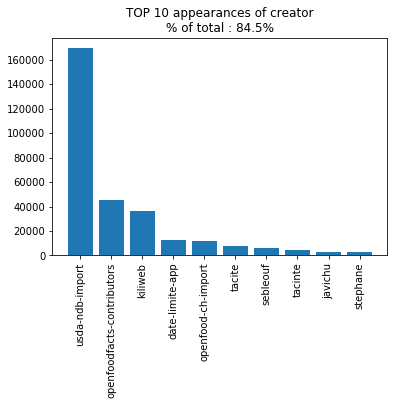

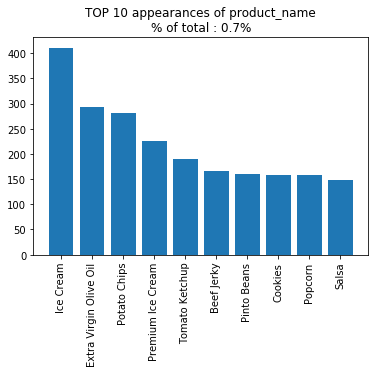

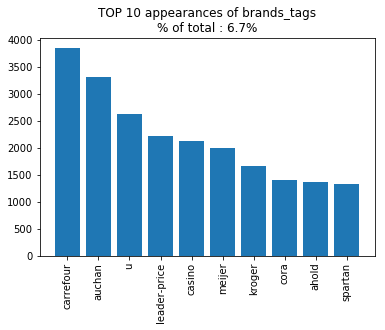

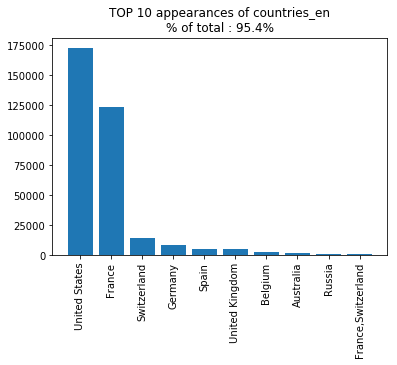

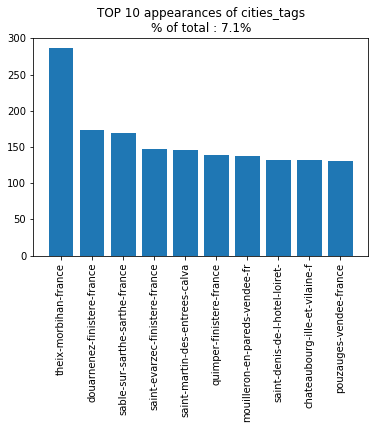

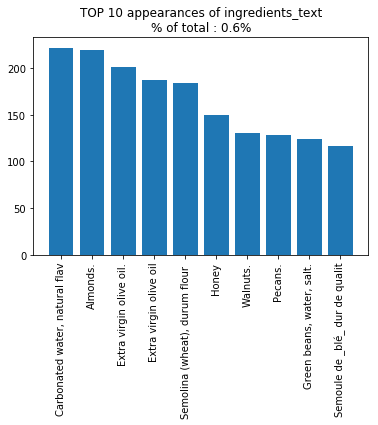

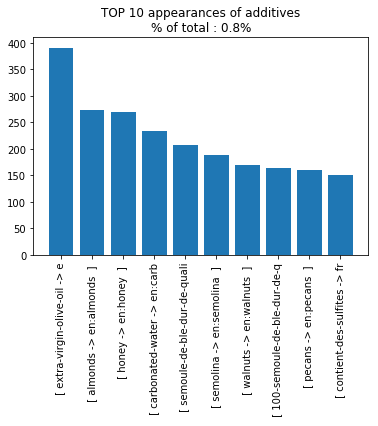

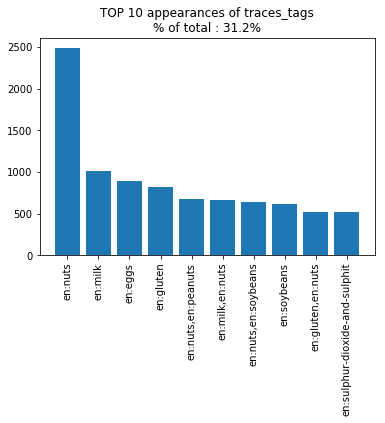

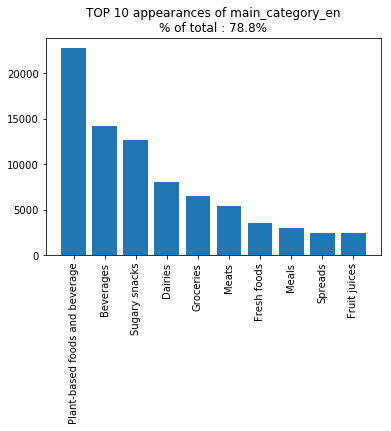

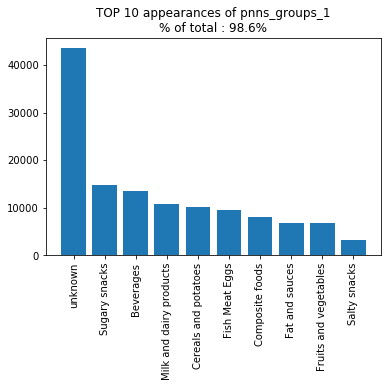

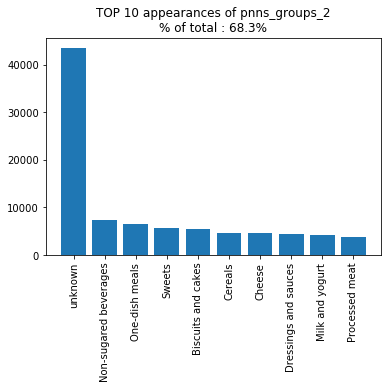

In [64]:
top_X_bar(df, categorical_columns, column_counted = 'code' , X=10) 

### Depending on the category column, we have really different behaviors : 
- in some of them, TOP 10 represents most of dataset products codes
    - creator
    - countries_en
    - pnns_groups_1 and 2
    - main_category_en
- in the other columns, TOP 10 features represent a very small part of the dataset because there are too few distinct values 
    - ingredients_text (to be worked on cleaning for Task C)
    - additives (to be cleaned too)
    - product names (which makes sense to have a large variety of product_names)
    
 


# Duplicates :
-------------------------------
We can see that, except the "0" code, we have **no duplicated "codes", but does not mean we have no duplicate products.**



In [65]:
df.duplicated().sum() 

30

In [66]:
top_X_values(df, ['code'] , 'code', 5)   # use the function I created to check the TOP 5

code
0                31
0605388117090     1
0605245006055     1
0605245007434     1
0605245007441     1
Name: code, dtype: int64


**All columns are the same on only 30 rows**, limited by the common "code" = 0.

We have to choose which columns are relevant to consider a duplicate. 
Let's choose our predefined columns.

In [67]:
df.duplicated(categorical_columns+list_col_num_50k).sum()  # see duplicated on all preselected columns (numerical > 50k dataset per column)

16076

### However we see that we have 16'076 rows which are equal on all other categorical columns and number columns above. I conclude that those can be considered duplicated

In [68]:
df = df.drop_duplicates((categorical_columns+list_col_num_50k));
df.shape

(338721, 147)

# We now have our dataframe df to work with :
- dropped 16 columns fully "NaN"
- replaced negatives on grams ==> 0
- dropped > 100g and > 3700 KJ for energy_100g
- dropped "duplicates" based on categorical + relevant numerical columns

But still keeping **outliers** to remove them case by case to not drop 100'000 columns as stated earlier. (with functions : *drop_outliers(df, list_column)* &  *drop_outliers_v2(df, list_column)* )









# Task B : In-depth analysis
--------------------------------------------------------------------

**1) A question I think interesing is the split of "how energy is made in food" split by proteins, fat, carbohydrates to identify why we have two different peaks at 0-200 KJ and 1500 KJ. Is there an impact on the nutrition_score, depending on the energy origin (fat, protein, carbs) ?**

**2) How the average good / bad nutrition scores composed in energy  ? Are they also linked to additives ?**

**3) What product category is most prone to have high values of energy ?**


Fat contains 37 kJ per gram

Alcohol contains 29 kJ per gram

Protein contains 17 kJ per gram

Carbohydrate contains 16 kJ per gram

Fiber contains 7 kJ per gram

**In this analysis, I chose to focus on Proteins, Fat and Carbohydrates only as they are the most usual items used in "nutrition"**  Alcohol also have a big impact on energy, but "The Nutri-Score does not apply to alcoholic drinks containing more than 1.2% alcohol" as stated in the nutri-score calculation : file:///D:/Downloads/2021%2003%2003%20QR%20scientifique%20et%20technique%20V41_EN_VF.pdf


## 1) How energy is composed ?  Impact on the nutrition_score ? 


In [69]:
# New dataframe for Task B with only a few columns
df_B = df.loc[:,(['product_name','pnns_groups_1','main_category_en','additives_n','energy_100g','proteins_100g','fat_100g','carbohydrates_100g','nutrition-score-fr_100g'])]
df_B.shape

(338721, 9)

In [70]:
df_B.describe().round(1)

,additives_n,energy_100g,proteins_100g,fat_100g,carbohydrates_100g,nutrition-score-fr_100g
count,279336.0,290738.0,289564.0,274988.0,274733.0,251598.0
mean,1.9,1116.6,7.2,12.6,31.6,9.2
std,2.5,782.7,8.2,16.9,28.9,9.0
min,0.0,0.0,0.0,0.0,0.0,-15.0
25%,0.0,385.0,0.8,0.1,5.8,1.0
50%,1.0,1088.0,4.9,5.3,20.0,10.0
75%,3.0,1674.0,10.0,20.0,57.7,16.0
max,30.0,3700.0,100.0,100.0,100.0,40.0


In [71]:
df_B.isnull().sum()

product_name                 5575
pnns_groups_1              211590
main_category_en           236501
additives_n                 59385
energy_100g                 47983
proteins_100g               49157
fat_100g                    63733
carbohydrates_100g          63988
nutrition-score-fr_100g     87123
dtype: int64

In [72]:
# Dropping any null values ?
df_B = df_B.dropna(how = 'any', subset = ['energy_100g','proteins_100g','fat_100g','carbohydrates_100g','nutrition-score-fr_100g'],axis = 0)   # drop if any of 5 value is null
df_B.describe().round(1)

,additives_n,energy_100g,proteins_100g,fat_100g,carbohydrates_100g,nutrition-score-fr_100g
count,225780.0,235394.0,235394.0,235394.0,235394.0,235394.0
mean,1.9,1166.3,7.8,13.2,32.5,9.2
std,2.5,755.1,8.1,15.9,28.2,9.0
min,0.0,0.0,0.0,0.0,0.0,-15.0
25%,0.0,448.0,1.8,0.9,6.7,1.0
50%,1.0,1172.0,5.7,7.1,22.7,10.0
75%,3.0,1703.0,10.7,21.4,58.0,16.0
max,30.0,3700.0,100.0,100.0,100.0,40.0


### We have dropped about 100'000 rows ("only 60'000 containing numerical values") but the stats have not changed much, which gives me a cleaner dataset to work with

Now we change grams into KJ : 

In [73]:
# Create 4 new columns with energy for proteins, fat and carbohydrates + a total
df_B['proteins_KJ'] = df_B['proteins_100g'].apply(lambda x : x * 17).round(2)
df_B['fat_KJ'] = df_B['fat_100g'].apply(lambda x : x * 37).round(2)
df_B['carbohydrates_KJ'] = df_B['carbohydrates_100g'].apply(lambda x : x * 17).round(2)
df_B['energy_total'] = df_B['carbohydrates_KJ']+df_B['fat_KJ']+df_B['proteins_KJ']
df_B['weight_total'] = df_B['carbohydrates_100g']+df_B['fat_100g']+df_B['proteins_100g']

In [74]:
df_B.describe().round(1)

,additives_n,energy_100g,proteins_100g,fat_100g,carbohydrates_100g,nutrition-score-fr_100g,proteins_KJ,fat_KJ,carbohydrates_KJ,energy_total,weight_total
count,225780.0,235394.0,235394.0,235394.0,235394.0,235394.0,235394.0,235394.0,235394.0,235394.0,235394.0
mean,1.9,1166.3,7.8,13.2,32.5,9.2,132.2,488.9,552.3,1173.4,53.5
std,2.5,755.1,8.1,15.9,28.2,9.0,138.3,588.1,479.7,763.2,32.6
min,0.0,0.0,0.0,0.0,0.0,-15.0,0.0,0.0,0.0,0.0,0.0
25%,0.0,448.0,1.8,0.9,6.7,1.0,30.6,32.6,113.4,453.3,22.4
50%,1.0,1172.0,5.7,7.1,22.7,10.0,96.9,264.2,386.4,1167.9,51.9
75%,3.0,1703.0,10.7,21.4,58.0,16.0,182.1,792.9,986.0,1721.9,87.0
max,30.0,3700.0,100.0,100.0,100.0,40.0,1700.0,3700.0,1700.0,5400.0,200.0


### We can see, that even though we dropped data single values > 100g, we still have several "errors" , with cumulative weight_total > 100g (up to 200g), or cumulative energy_total > 3700 KJ (up to 5300 KJ)

In [75]:
print(((df_B['energy_total']>3700) | (df_B['weight_total']>100)).sum(),'errors (>100g or > 3700KJ) to be deleted')

1727 errors (>100g or > 3700KJ) to be deleted


### Quite few errors, no problem to be dropped !

In [76]:
df_B = df_B.drop(df_B.loc[(df_B['energy_total']>3700) | (df_B['weight_total']>100)].index , axis = 0)
df_B.describe().round(1)

,additives_n,energy_100g,proteins_100g,fat_100g,carbohydrates_100g,nutrition-score-fr_100g,proteins_KJ,fat_KJ,carbohydrates_KJ,energy_total,weight_total
count,224082.0,233667.0,233667.0,233667.0,233667.0,233667.0,233667.0,233667.0,233667.0,233667.0,233667.0
mean,1.9,1158.6,7.7,13.1,32.2,9.1,131.6,484.3,548.1,1164.1,53.1
std,2.5,751.4,8.1,15.8,28.1,9.0,137.6,584.9,478.0,757.3,32.3
min,0.0,0.0,0.0,0.0,0.0,-15.0,0.0,0.0,0.0,0.0,0.0
25%,0.0,448.0,1.8,0.9,6.7,1.0,30.4,32.6,113.4,448.9,22.2
50%,1.0,1159.0,5.6,7.0,22.1,10.0,95.2,259.7,376.4,1157.2,51.0
75%,3.0,1686.0,10.7,21.4,57.7,16.0,182.1,792.9,980.7,1710.7,86.7
max,30.0,3700.0,100.0,100.0,100.0,40.0,1700.0,3700.0,1700.0,3700.0,100.0


### Now we can see that in some cases : calculated energy is higher than the "energy_100g" filled in the dataframe.

Let's look at it :


In [77]:
energy_gap = (df_B['energy_total'] - df_B['energy_100g'])
print('Mean :', energy_gap.mean(), 'Max :', energy_gap.max(),'STD :', energy_gap.std()) 

Mean : 5.49826477850959 Max : 3700.0 STD : 142.39741342024024


In [78]:
(energy_gap > 0).sum()   # Number of cases where the energy I calculated is above total energy_100g which is not possible.

102950

### We have a great numbers of "errors" like this, i chose to plot to differentiate bigger errors from small ones : 

**energy_100g is supposed to be higher than energy_total** because I calculated it with Carbs + Proteins + Fat but there is still other nutrients that bring energy (Fiber, Alcohol)

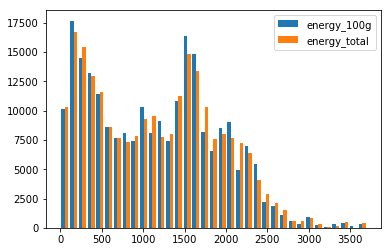

In [79]:
plt.hist([df_B['energy_100g'], df_B['energy_total']], bins=35, label = ['energy_100g','energy_total']);    # plot both energy datasets
plt.legend(loc="upper right");

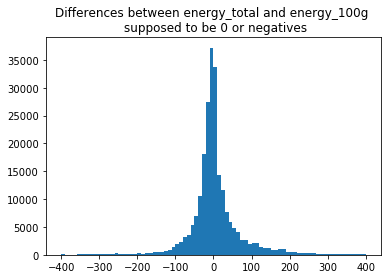

In [80]:
plt.hist(energy_gap , bins = 80, range = (-400,+400));   # plot the differences distribution between both
plt.title('Differences between energy_total and energy_100g \n supposed to be 0 or negatives');

### As the difference is rather "small" and centered (normal distribution) : most of it less than 200 kj, I will consider my calculation right and replace it 

**I will then use : energy_total** to replace the smaller value in energy_100g

In [81]:
def change_col1_to_col2(df, col1, col2):  # create a funcition to replace a column by another if value1 < value 2
    df=df.copy()
    for row in df.index:
        
        if df.loc[row,col1] < df.loc[row,col2]:     # if a value if inferior to the other
            df.loc[row,col1] = df.loc[row,col2]     # replace the value by the other
    return df

In [82]:
df_B = change_col1_to_col2(df_B,'energy_100g','energy_total') # replace energy_100g by energy_total if inferior
energy_gap = (df_B['energy_total'] - df_B['energy_100g'])

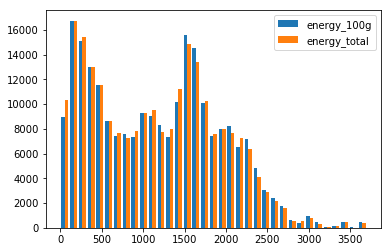

In [83]:
plt.hist([df_B['energy_100g'], df_B['energy_total']], bins=35, label = ['energy_100g','energy_total']);    # plot both energy datasets
plt.legend(loc="upper right");

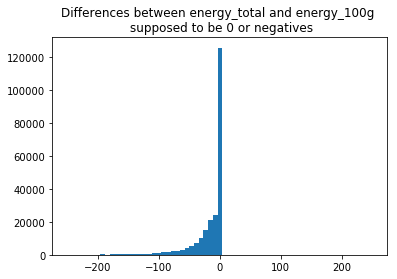

In [84]:
plt.hist(energy_gap , bins = 65, range = (-250, 250));   # plot the differences distribution between both
plt.title('Differences between energy_total and energy_100g \n supposed to be 0 or negatives');

### Here we have replaced energy values at the minimum by at least the sum of energy from carbs + fat + proteins so we can later make pie charts which cannot go above 100%.

### I have tried removing outliers (with z_score and 95% quartile), but, as we have already removed the supposed errors, I come to the conclusion that no outliers filter is needed as we would lost all data between 3400 KJ and 3700 KJ (which represent an important part of type of food ==> oil, butter... for example..see below)



In [85]:
# create a df_B_outliers for the record even though we will keep using df_B full
df_B_outliers =  drop_outliers_v2(df_B, ['energy_100g','proteins_KJ','fat_KJ','carbohydrates_KJ','nutrition-score-fr_100g'])
print( df_B_outliers.shape, df_B.shape)

(221819, 14) (233667, 14)


In [86]:
# See the top energy foods for the original dataframe and without outliers :

print(df_B_outliers[['energy_100g','energy_total','product_name']].sort_values('energy_100g', ascending = False).head())
print(df_B[['energy_100g','energy_total','product_name']].sort_values('energy_100g', ascending = False).head())

        energy_100g  energy_total                                product_name
273998       3582.0         855.9                  Tapas Moules Ail et Persil
265492       3577.0         810.3             Galette au chevre et lardons x2
207878       3577.0         854.5  Quart De Jambon Cru Prétranché 250g Casino
239284       3573.0         849.8                 Melmelada De Cireres Negres
349141       3556.0         831.5    Crème glacée crème de vanille 1,4 litres
        energy_100g  energy_total                              product_name
312336       3700.0        3700.0                             Huile D'olive
197920       3700.0        3700.0                        Huile de tournesol
197922       3700.0        3700.0                        Huile de tournesol
326221       3700.0        3700.0  Sais ASTRA COCOS graisse de noix de coco
249142       3700.0        3700.0                             Graisse d'oie


By th way, "Crème glacée - Crème de vanille" seems higher than usual (between 700 and 800 KJ per 100g)
The same way, we notice a big difference between my calculation (energy_total) and the given energy_100g.. 

Another example : **"Galette au chevre et lardons x2" are given at 3577 KJ but on internet at 858 KJ** (close to my calculation 810 KJ even missing fiber or alcohol)


### Let's drop the datapoints which can be a problem in our analysis using the "energy_gap" already computed.

Some of them are not for 100grams but for the whole "product"

In [87]:
# I can remove a big part of it with all differences above 250 KJ (as plotted above)
df_B.loc[(energy_gap < -250)].sort_values('energy_100g')[['energy_100g','energy_total','product_name','carbohydrates_100g']]

,energy_100g,energy_total,product_name,carbohydrates_100g
139986,251.0,0.00,"B&B, Soy Sauce",0.00
355559,255.0,0.00,Kiwi,0.00
146320,280.0,0.00,Corn Seasonings,0.00
87414,280.0,0.00,Pickled Ginger,0.00
240285,285.0,5.10,Vin Rouge De Pays Cevennes 75CL 2015 Vol. 13.5...,0.20
219592,285.0,5.10,Cotes du Rhone bio AOC rouge Chateau De Bastet...,0.20
207330,285.0,5.10,Vin rouge Cabernet Merlot Club des sommeliers 1 x,0.20
40662,297.0,43.76,Wild Forest Mushrooms,0.83
248806,301.0,34.34,"Vin mousseux charles volner 6,5° 75cl cuvé col...",2.02
230147,305.0,9.69,Vin blanc AOC d'Alsace Gewurztraminer prestige...,0.50


In [88]:
# Dropping 2800 rows.
df_B.drop(df_B.loc[(energy_gap < -250)].index).shape

(230929, 14)

## Analyze the split by energy ranges : 
Now we have cleaner data for energy, we can start this question : **how is the energy distributed between fat, carbs and proteins :**
- LOW ENERGY (0-400kj)
- MEDIUM (400-1200kj)
- HIGH (1200-2000kj)
- VERY HIGH (>2000kj)



In [89]:
df_B.loc[:,['product_name','pnns_groups_1','proteins_KJ','fat_KJ','carbohydrates_KJ','energy_total','energy_100g']].sort_values('energy_total', ascending = False)[:10]

,product_name,pnns_groups_1,proteins_KJ,fat_KJ,carbohydrates_KJ,energy_total,energy_100g
90328,Vegetable Oil,NaN,0.0,3700.0,0.0,3700.0,3700.0
308935,Azeite de Moura DOP virgem extra,Fat and sauces,0.0,3700.0,0.0,3700.0,3700.0
224600,Huile de noix et colza Bio,Fat and sauces,0.0,3700.0,0.0,3700.0,3700.0
224601,huile d'olive,Fat and sauces,0.0,3700.0,0.0,3700.0,3700.0
224986,Huile d'olive vierge extra,Fat and sauces,0.0,3700.0,0.0,3700.0,3700.0
5926,Vegetable Oil,NaN,0.0,3700.0,0.0,3700.0,3700.0
5925,Canola Oil,NaN,0.0,3700.0,0.0,3700.0,3700.0
5913,Corn Oil,NaN,0.0,3700.0,0.0,3700.0,3700.0
188419,Huile de tournesol,Fat and sauces,0.0,3700.0,0.0,3700.0,3700.0
188412,Jog'Frit,Fat and sauces,0.0,3700.0,0.0,3700.0,3700.0


In [90]:
# Create a new column with the 4 categories I have identified based on the given energy :
df_B['energy_level'] = ''
df_B['energy_level'].loc[df_B['energy_100g'] < 600] = 'low'
df_B['energy_level'].loc[(df_B['energy_100g'] >= 600) & (df_B['energy_100g'] < 1400)] = 'medium'
df_B['energy_level'].loc[(df_B['energy_100g'] >= 1400) & (df_B['energy_100g'] < 3000)] = 'high'
df_B['energy_level'].loc[(df_B['energy_100g'] >= 3000)] = 'very high'

C:\Users\Utilisateur\anaconda3v2\envs\exts-ml\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


(233667, 15)

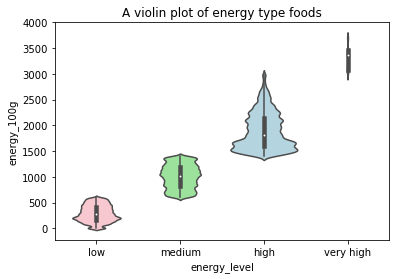

In [91]:
# Let's plot a violin chart to check the limits and distribution of each group
my_palette = ["pink","lightgreen","lightblue",'yellow']
sns.violinplot(x=df_B['energy_level'], y=df_B['energy_100g'], palette=my_palette, order = ['low','medium','high','very high'],scale = 'count');
plt.title("A violin plot of energy type foods");
df_B.shape

In [92]:
# Count of items in each category
print((df_B['energy_level'] == 'low').sum())
print((df_B['energy_level'] == 'medium').sum())
print((df_B['energy_level'] == 'high').sum())
print((df_B['energy_level'] == 'very high').sum())

71409
61098
99080
2080


### We can indeed see with the violin plot, the two peaks around 200KJ and 1500KJ (which we can't see in a boxplot type). "Very High" energy group is not really interesting as it does not represent an important part (< 1% of food items in this dataframe) but a very different composition - which is interesting - as you can see below in the pie charts (average 95% of fat)

In [93]:
# Create arrays of values being the ratio of energy from proteins, fat, carbohydrates... the remaining percent to 100% is energy not from these 3.
low_energy_pct = [df_B[df_B['energy_level']=='low']['proteins_KJ'].sum()/df_B[df_B['energy_level']=='low']['energy_100g'].sum(),df_B[df_B['energy_level']=='low']['fat_KJ'].sum()/df_B[df_B['energy_level']=='low']['energy_100g'].sum(),df_B[df_B['energy_level']=='low']['carbohydrates_KJ'].sum()/df_B[df_B['energy_level']=='low']['energy_100g'].sum()]
med_energy_pct = [df_B[df_B['energy_level']=='medium']['proteins_KJ'].sum()/df_B[df_B['energy_level']=='medium']['energy_100g'].sum(),df_B[df_B['energy_level']=='medium']['fat_KJ'].sum()/df_B[df_B['energy_level']=='medium']['energy_100g'].sum(),df_B[df_B['energy_level']=='medium']['carbohydrates_KJ'].sum()/df_B[df_B['energy_level']=='medium']['energy_100g'].sum()]
high_energy_pct = [df_B[df_B['energy_level']=='high']['proteins_KJ'].sum()/df_B[df_B['energy_level']=='high']['energy_100g'].sum(),df_B[df_B['energy_level']=='high']['fat_KJ'].sum()/df_B[df_B['energy_level']=='high']['energy_100g'].sum(),df_B[df_B['energy_level']=='high']['carbohydrates_KJ'].sum()/df_B[df_B['energy_level']=='high']['energy_100g'].sum()]
vhigh_energy_pct = [df_B[df_B['energy_level']=='very high']['proteins_KJ'].sum()/df_B[df_B['energy_level']=='very high']['energy_100g'].sum(),df_B[df_B['energy_level']=='very high']['fat_KJ'].sum()/df_B[df_B['energy_level']=='very high']['energy_100g'].sum(),df_B[df_B['energy_level']=='very high']['carbohydrates_KJ'].sum()/df_B[df_B['energy_level']=='very high']['energy_100g'].sum()]
# I chose to calculate directly the percentage and not use the values itself as I want to see the "remaining energy" in blank (not from proetins, fat or carbs)

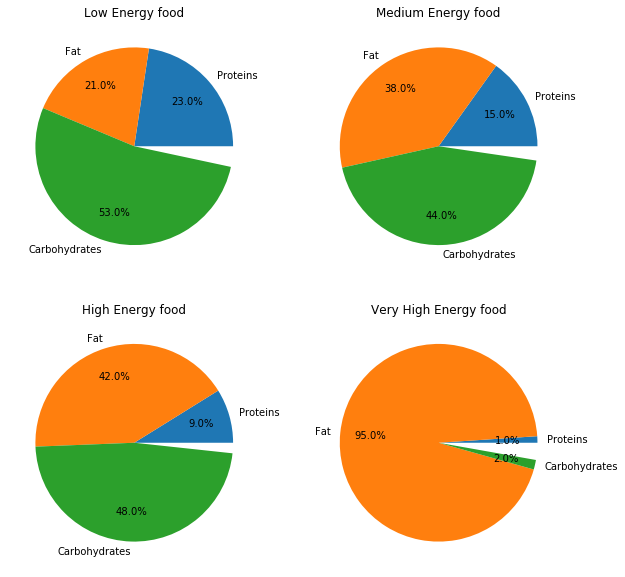

In [94]:
fig, axes = plt.subplots(
    2, 2 ,gridspec_kw={"height_ratios": (0.5, 0.5)}, figsize=(10,10)
)
axes[0,0].pie(low_energy_pct, labels = ['Proteins', 'Fat', 'Carbohydrates'], pctdistance = 0.7, autopct = lambda x: str(round(x, 0)) + '%')
axes[0,0].set_title('Low Energy food')
axes[0,1].pie(med_energy_pct, labels = ['Proteins', 'Fat', 'Carbohydrates'], pctdistance = 0.7, autopct = lambda x: str(round(x, 0)) + '%')
axes[0,1].set_title('Medium Energy food')
axes[1,0].pie(high_energy_pct, labels = ['Proteins', 'Fat', 'Carbohydrates'], pctdistance = 0.7, autopct = lambda x: str(round(x, 0)) + '%')
axes[1,0].set_title('High Energy food');
axes[1,1].pie(vhigh_energy_pct, labels = ['Proteins', 'Fat', 'Carbohydrates'], pctdistance = 0.7, autopct = lambda x: str(round(x, 0)) + '%')
axes[1,1].set_title('Very High Energy food');

### Blank values represent the part of energy_100g not coming from Proteins, Carbohydrates or Fat. Probably coming from Fibers (7 KJ/g) mostly and a bit of Alcohol (29 KJ/g). 


**We can see here indeed that the higher the food is energetic, the bigger part "Fat" represents in the energy. Which is logic due to Fat being the most enregy-dense (37 KJ/g).** It is also interesting to see that **carbs have a higher proportion than proteins (~5 times) even though they have the same energy density (17 KJ/g).**

### Let's see the impact on nutrition_scores for each category of energetic "groups"

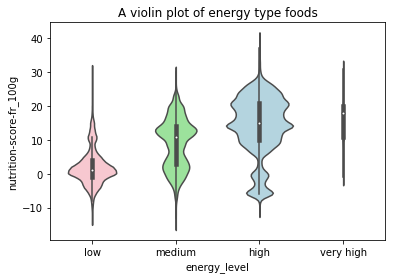

In [95]:
# Let's plot a violin chart to check the limits and distribution of each group
my_palette = ["pink","lightgreen","lightblue",'yellow']
sns.violinplot(x=df_B['energy_level'], y=df_B['nutrition-score-fr_100g'], palette=my_palette, order = ['low','medium','high','very high'],scale = 'count');
plt.title("A violin plot of energy type foods");

In [96]:
# Quick check of statistics for these plots
df_B.groupby('energy_level')['nutrition-score-fr_100g'].describe().sort_values('mean')

,count,mean,std,min,25%,50%,75%,max
energy_level,,,,,,,,
low,71409.0,1.944167,5.024975,-14.0,-1.0,1.0,4.0,31.0
medium,61098.0,9.126240,7.216245,-15.0,3.0,11.0,14.0,30.0
high,99080.0,14.131379,8.724656,-11.0,10.0,15.0,21.0,40.0
very high,2080.0,16.170192,5.485989,-1.0,11.0,18.0,20.0,31.0


### As stated in the nutri-score calculation https://fr.openfoodfacts.org/nutriscore the lower, the better. Which we could have guessed as the more energy (and fatty) food is, the higher the score. And on the contrary, low energy foods seem to have a lower ( = better) score.
- Low energy food mostly centered on score = 0
- Medium energy food ==> 5 to 20 mostly
- High energy food ==> 10 to 25 mostly and going up to 40 (maximum score)
- Very high energy food ==> 10 to 25 as well, but less extanded on the extremes (mostly oils or butter type of food)

### However : we can see the violin plots seem to expand on a wide range of scores for a given energy range, it implies that energy is not the only factor for the nutri-score calculation, indeed, even low energy food can go up to score = 30 and very high energy can have a good score < 0. We will deepen on that topic in Task F ! (this proves that other factors influence the nutri_score)



In [97]:
# Is there a strong correlation with energy ?
correlation = df_B['nutrition-score-fr_100g'].corr(df_B['energy_total'])
correlation.round(2)
# 0.61 is not a great result for a correlation, but it shows there is an impact, but not strong.

0.61

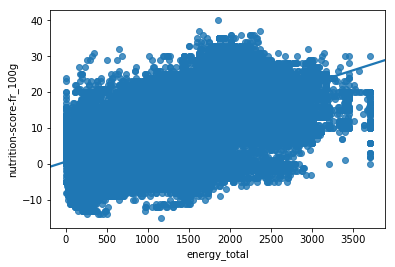

In [98]:
sns.regplot(df_B['energy_total'],df_B['nutrition-score-fr_100g']); # plot the energy vs nutri-score
# indeed this so-called correlation cannot be validated.

### As anticipated with the violin plot, this plot is not enough. The energy has a slight positive impact (bad) on the nutrition score BUT it is not strongly correlated on its own, it is too blurry, too much diversity in the datapoints. Let us split this correlation by "origin" of energy.

In [99]:
# Calculate a possible correlation depending on the origin of "energy" : 
correlation_protein = df_B['nutrition-score-fr_100g'].corr(df_B['proteins_KJ']).round(2)
correlation_fat = df_B['nutrition-score-fr_100g'].corr(df_B['fat_KJ']).round(2)
correlation_carbs = df_B['nutrition-score-fr_100g'].corr(df_B['carbohydrates_KJ']).round(2)
print(correlation_protein,correlation_fat, correlation_carbs)  # influence of energy origin to nutrition scores

0.1 0.57 0.25


### ==> **CONCLUSION** : Still not a strong correlation, BUT we can see a positive impact of energy. Moreover fat as a bigger impact than Carbs or Protein (very little impact). Maybe we can find more ties between energy + additives and nutrition scores ?

## 2) Nutrition Scores Class and number of additives
------------------------------------------------------

COUNTRY?

In [100]:
# Create a new column with the 5 nutri_score classes based on the official french calculation :
df_B['nutri_score'] = ''
df_B['nutri_score'].loc[df_B['nutrition-score-fr_100g'] < -1] = 'A'
df_B['nutri_score'].loc[(df_B['nutrition-score-fr_100g'] >= -1) & (df_B['nutrition-score-fr_100g'] < 4)] = 'B'
df_B['nutri_score'].loc[(df_B['nutrition-score-fr_100g'] >= 4) & (df_B['nutrition-score-fr_100g'] < 12)] = 'C'
df_B['nutri_score'].loc[(df_B['nutrition-score-fr_100g'] >= 11) & (df_B['nutrition-score-fr_100g'] < 17)] = 'D'
df_B['nutri_score'].loc[(df_B['nutrition-score-fr_100g'] >= 17)] = 'E'

C:\Users\Utilisateur\anaconda3v2\envs\exts-ml\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [101]:
# module to plot multiple distribution used later in my course, I installed it in my command conda install -c conda-forge joypy
import joypy

<Figure size 960x560 with 0 Axes>

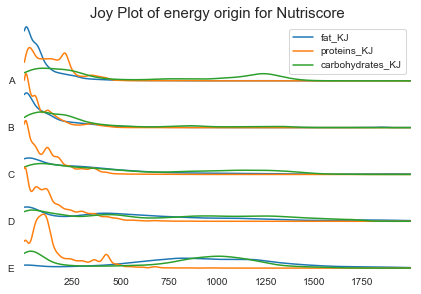

A : 28140
B : 53940
C : 41357
D : 55332
E : 54898


In [260]:
# Distribution plot : easier to read for multiple distributions (found on TOP 50 Matplotlib visualizations from joypy (installed it on the environment))
plt.figure(figsize=(12,7), dpi= 80)
fig, axes = joypy.joyplot(df_B, column=['fat_KJ', 'proteins_KJ', 'carbohydrates_KJ'], by="nutri_score", ylim='own', legend = True, overlap = 0.5, x_range=[0,2000], fill=False )

# Decoration
plt.title('Joy Plot of energy origin for Nutriscore', fontsize=15)
plt.show();
print('A :',(df_B['nutri_score']=='A').sum()) # how many products of each nutriscore do we have
print('B :',(df_B['nutri_score']=='B').sum())
print('C :',(df_B['nutri_score']=='C').sum())    
print('D :',(df_B['nutri_score']=='D').sum())
print('E :',(df_B['nutri_score']=='E').sum())

In [195]:
# Create arrays of values being the ratio of energy from proteins, fat, carbohydrates... the remaining percent to 100% is energy not from these 3.
A_energy_pct = [df_B[df_B['nutri_score']=='A']['proteins_KJ'].sum()/df_B[df_B['nutri_score']=='A']['energy_100g'].sum(),df_B[df_B['nutri_score']=='A']['fat_KJ'].sum()/df_B[df_B['nutri_score']=='A']['energy_100g'].sum(),df_B[df_B['nutri_score']=='A']['carbohydrates_KJ'].sum()/df_B[df_B['nutri_score']=='A']['energy_100g'].sum()]
B_energy_pct = [df_B[df_B['nutri_score']=='B']['proteins_KJ'].sum()/df_B[df_B['nutri_score']=='B']['energy_100g'].sum(),df_B[df_B['nutri_score']=='B']['fat_KJ'].sum()/df_B[df_B['nutri_score']=='B']['energy_100g'].sum(),df_B[df_B['nutri_score']=='B']['carbohydrates_KJ'].sum()/df_B[df_B['nutri_score']=='B']['energy_100g'].sum()]
C_energy_pct = [df_B[df_B['nutri_score']=='C']['proteins_KJ'].sum()/df_B[df_B['nutri_score']=='C']['energy_100g'].sum(),df_B[df_B['nutri_score']=='C']['fat_KJ'].sum()/df_B[df_B['nutri_score']=='C']['energy_100g'].sum(),df_B[df_B['nutri_score']=='C']['carbohydrates_KJ'].sum()/df_B[df_B['nutri_score']=='C']['energy_100g'].sum()]
D_energy_pct = [df_B[df_B['nutri_score']=='D']['proteins_KJ'].sum()/df_B[df_B['nutri_score']=='D']['energy_100g'].sum(),df_B[df_B['nutri_score']=='D']['fat_KJ'].sum()/df_B[df_B['nutri_score']=='D']['energy_100g'].sum(),df_B[df_B['nutri_score']=='D']['carbohydrates_KJ'].sum()/df_B[df_B['nutri_score']=='D']['energy_100g'].sum()]
E_energy_pct = [df_B[df_B['nutri_score']=='E']['proteins_KJ'].sum()/df_B[df_B['nutri_score']=='E']['energy_100g'].sum(),df_B[df_B['nutri_score']=='E']['fat_KJ'].sum()/df_B[df_B['nutri_score']=='E']['energy_100g'].sum(),df_B[df_B['nutri_score']=='E']['carbohydrates_KJ'].sum()/df_B[df_B['nutri_score']=='E']['energy_100g'].sum()]                
# I chose to calculate directly the percentage and not use the values itself as I want to see the "remaining energy" in blank (not from proetins, fat or carbs

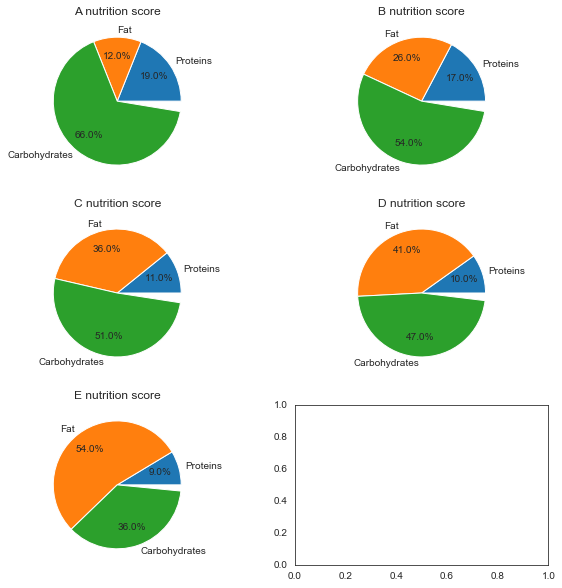

In [227]:
# Plot the average composition 

fig, axes = plt.subplots(
    3, 2 ,gridspec_kw={"height_ratios": (0.5, 0.5,0.5)}, figsize=(10,10)
)
axes[0,0].pie(A_energy_pct, labels = ['Proteins', 'Fat', 'Carbohydrates'], pctdistance = 0.7, autopct = lambda x: str(round(x, 0)) + '%')
axes[0,0].set_title('A nutrition score')
axes[0,1].pie(B_energy_pct, labels = ['Proteins', 'Fat', 'Carbohydrates'], pctdistance = 0.7, autopct = lambda x: str(round(x, 0)) + '%')
axes[0,1].set_title('B nutrition score')
axes[1,0].pie(C_energy_pct, labels = ['Proteins', 'Fat', 'Carbohydrates'], pctdistance = 0.7, autopct = lambda x: str(round(x, 0)) + '%')
axes[1,0].set_title('C nutrition score');
axes[1,1].pie(D_energy_pct, labels = ['Proteins', 'Fat', 'Carbohydrates'], pctdistance = 0.7, autopct = lambda x: str(round(x, 0)) + '%')
axes[1,1].set_title('D nutrition score');
axes[2,0].pie(E_energy_pct, labels = ['Proteins', 'Fat', 'Carbohydrates'], pctdistance = 0.7, autopct = lambda x: str(round(x, 0)) + '%')
axes[2,0].set_title('E nutrition score');

### From these two plots :
### The worse the Nutriscore is, the more : 
- carbohydrates have high energy but lower proportion
- fat have a high energy and higher proportion
- proteins have also higher energy but lower proportion too

### Good Nutriscore (A and B) : 
- low energy from fat


### It is interesting to see that like the Higher the score, the more carbohydrates energy is lost and more for fat energy (as we could foresee in the Joyplot)



<Figure size 960x560 with 0 Axes>

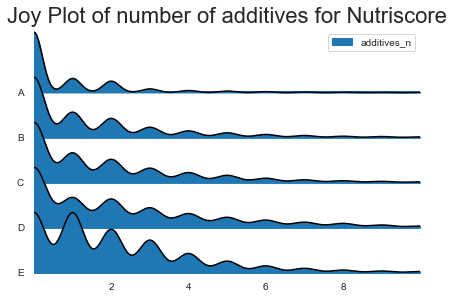

In [157]:
# Distribution plot : easier to read for multiple distributions (found on TOP 50 Matplotlib visualizations from joypy (installed it on the environment))
plt.figure(figsize=(12,7), dpi= 80)
fig, axes = joypy.joyplot(df_B, column=['additives_n'], by="nutri_score", ylim='own', legend = True, overlap = 0.5, x_range=[0,10])

# Decoration
plt.title('Joy Plot of number of additives for Nutriscore', fontsize=22)
plt.show();

### Based on this second graph, we could say additives can be in either good or bad nutriscores. However, NutriScore = E seem to have often, one or more additives.
Let's check for correlations : 


0.61

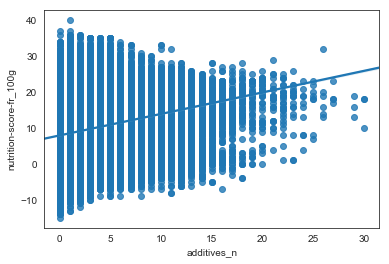

In [199]:
sns.regplot(df_B['additives_n'],df_B['nutrition-score-fr_100g']); # plot the energy vs nutri-score
correlation_additives = df_B['nutrition-score-fr_100g'].corr(df_B['additives_n'])
correlation.round(2) # same correlations level

### A very high number of additives does not implies higher scores, but usually a bad score.
- Low number of additives ranges nutrition scores on the whole range (-10 very good to ~40 worst)
- Higher number of additives ranges nutrition scores on the whole range



### These 3 measures are not directly correlated either, but maybe we could try to plot a 3D visualisation to watch all of them at once

Text(0.5, 0, 'Z Label')

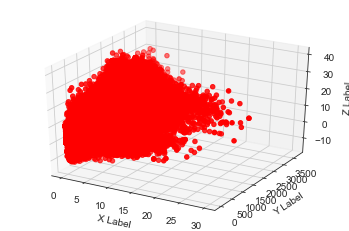

In [217]:
# from internet model to plot 3D surfaces

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

X = df_B['additives_n']
Y = df_B['energy_100g']
Z = df_B['nutrition-score-fr_100g']


fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X, Y, Z, c='r')
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')


### 3D plot not relevant with so many data
### Let's try a pairplot with colors for each NutriScore (A,B,C,D,E : the same we can on food packages)

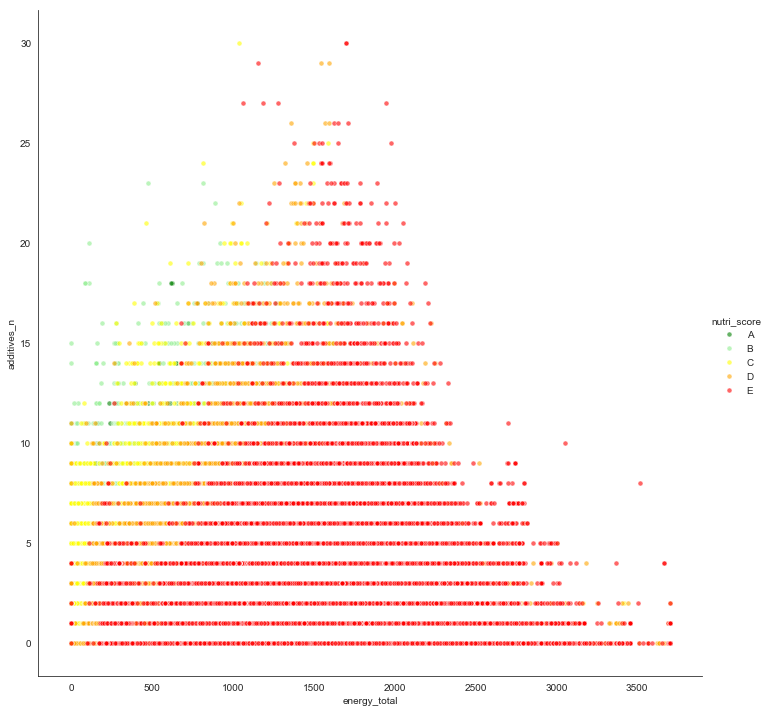

In [258]:
plot_kws={"s": 5}
sns.pairplot(df_B, x_vars=['energy_total'], y_vars = ['additives_n'], height = 10, hue='nutri_score', hue_order = ['A','B','C','D','E'] , palette = ['green','lightgreen','yellow','orange','red'],plot_kws={'alpha':0.60 , 's':25})


## It does not seem to be an easy way to conclude on the link between this 3 figures other than :
- higher energy "usually" gives higher score (worse)
- more additives "usually" gives higher score (worse)

We can suppose that there might be different kind of additives, good and / or bad and other factors influencing the score (sugars, salt...)

The shape is interesting though, we notice a higher use of additives in food between 1000 to 2500 KJ. (which is actually where half the products are based on the distribution in task A)

# 3 - What product categories are most prone to have high energy values and high score ? 
---------------------------------------------